# Production of Animal Products in Mainland China
# 中国大陆动物产品的生产情况

## Ready to work  准备

### Import Libraries 导入工具库

In [1]:
# uncomment following lines to install:
# !pip install folium  
# !pip install matplotlib_venn

# import necessary libs
import json
import os
import time
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns

import folium
from folium import plugins
from matplotlib_venn import venn2, venn3, venn3_circles

%matplotlib inline

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',1000)

### Read Data Frame 读取数据

- 'MeatProduction_clean.csv' is the data needed in this program. See how the data was obtained and cleaned: [CN_AnimalProduction_DataCleaning](CN_AnimalProduction_DataCleaning);

- 'AnimalProduction_clean_doc.csv' explains the data's feilds;

- 'GeoNameSheet_cn.csv' lists all the mainland China's areas;

In [2]:
data = pd.read_csv('./data/hybrid/AnimalProduction_clean.csv')
doc = pd.read_csv('./data/hybrid/AnimalProduction_doc.csv')
geoname = pd.read_csv('./data/NBS/GeoNameSheet_cn.csv')
display(doc)
# display(data.head())
# display(geoname.head())

Item-En 项目名称: Item_Cn  \
0                            Area            地区   
1                            Year            年份   
2                   Stock, cattle         存栏量_牛   
3             Stock, goat & sheep     存栏量_山羊&绵羊   
4                      Stock, pig         存栏量_猪   
5                    Stock, birds        存栏量_禽类   
6             Slaughtered, cattle         屠宰量_牛   
7       Slaughtered, goat & sheep     屠宰量_山羊&绵羊   
8                Slaughtered, pig         屠宰量_猪   
9              Slaughtered, birds        屠宰量_禽类   
10        Meat Production, cattle         肉产量_牛   
11  Meat Production, goat & sheep     肉产量_山羊&绵羊   
12           Meat Production, pig         肉产量_猪   
13         Meat Production, birds        肉产量_禽类   
14          Egg Production, birds           蛋产量   
15           Milk Production, cow         奶产量_牛   
16             Meat Yield, cattle        单位产量_牛   
17       Meat Yield, goat & sheep    单位产量_山羊&绵羊   
18                Meat Yield, pig        单位产量_猪   
19              Meat Yield, birds       单位产量_禽类   
20                 Aquatic, total          水产总量   
21               Aquatic, animals         水产肉类量   
22                  Marine, total          海水产量   
23                Marine, capture       海水产量_捕捞   
24            Marine, aquaculture       海水产量_养殖   
25                    Marine Fish        海水产量_鱼   
26             Marine Crustaceans       海水产量_虾蟹   
27                Marine Molluscs       海水产量_贝类   
28                  Marine Plants       海水产量_藻类   
29                 Marine, others       海水产量_其他   
30              Freshwater, total          淡水产量   
31            Freshwater, capture       淡水产量_捕捞   
32        Freshwater, aquaculture       淡水产量_养殖   
33                Freshwater Fish        淡水产量_鱼   
34         Freshwater Crustaceans       淡水产量_虾蟹   
35            Freshwater Molluscs       淡水产量_贝类   
36             Freshwater, others       淡水产量_其他   

                                                                        Explanation-En  \
0   Name of countries, areas or China's provinces (or provincial level areas of China)   
1                                                                               Years.   
2                                                         Numbers of stocks of cattle.   
3                                   Numbers of stocks of the total of goats and sheep.   
4                                                           Numbers of stocks of pigs.   
5                                                          Numbers of stocks of birds.   
6                                              Numbers of slaughtered cattle for meat.   
7                                     Numbers of slaughtered goats and sheep for meat.   
8                                                Numbers of slaughtered pigs for meat.   
9                 Numbers of slaughtered birds for meat, mainly from chicken and duck.   
10                                                 Weights of meat produced by cattle.   
11                                         Weights of meat produced by goat and sheep.   
12                                                    Weights of meat produced by pig.   
13                    Weights of meat produced by birds, ainly from chicken and duck.    
14                    Weights of eggs produced by birds, mainly from chicken and duck.   
15                                              Weights of fresh milk produced by cow.   
16                                     Mean value of weights of meat from each cattle.   
17                              Mean value of weights of meat from each goat or sheep.   
18                                        Mean value of weights of meat from each pig.   
19         Mean value of weights of meat from each bird. Mainly from chicken and duck.   
20                                               Total weights of aquatic productions.   
21                                                            Weights of aquatic meat.   
22               

In [3]:
df = pd.merge(geoname, data, on='Area', how='outer')
df.head()

AreaNum             Area     Region  Year  Stock, cattle  \
0       41  China, mainland  East Asia  1961         4940.0   
1       41  China, mainland  East Asia  1962         4676.0   
2       41  China, mainland  East Asia  1963         4736.0   
3       41  China, mainland  East Asia  1964         4894.0   
4       41  China, mainland  East Asia  1965         5242.0   

   Stock, goat & sheep  Stock, pig  Stock, birds  Slaughtered, cattle  \
0              11281.0      8227.0       62600.0                 50.6   
1              12387.0      7552.0       64200.0                 69.0   
2              13465.0      9997.0       66300.0                 92.5   
3              13747.0     13180.0       68400.0                103.5   
4              13669.0     15247.0       69000.0                116.0   

   Slaughtered, goat & sheep  Slaughtered, pig  Slaughtered, birds  \
0                     1000.0            3300.0             54500.0   
1                     1000.0            4300.0             56400.0   
2                     1200.0            7800.0             58000.0   
3                     1400.0           10500.0             59400.0   
4                     1570.0           12167.0             61600.0   

   Meat Production, cattle  Meat Production, goat & sheep  \
0                      4.3                           10.0   
1                      6.2                           10.0   
2                      8.3                           12.0   
3                      9.3                           14.0   
4                     10.4                           16.0   

   Meat Production, pig  Meat Production, birds  Egg Production, birds  \
0                 137.0                   57.00                  150.0   
1                 178.0                   59.00                  152.0   
2                 330.0                   60.75                  154.0   
3                 450.0                   62.25                  158.0   
4                 525.0                   64.50                  162.0   

   Milk Production, cow  Meat Yield, cattle  Meat Yield, goat & sheep  \
0                  60.0                85.0                 10.000000   
1                  62.0                89.9                 10.000000   
2                  63.5                89.7                 10.000000   
3                  64.0                89.9                 10.000000   
4                  64.5                89.7                 10.191083   

   Meat Yield, pig  Meat Yield, birds  Aquatic, total  Aquatic, animals  \
0             41.5           1.045872             NaN               NaN   
1             41.4           1.046099             NaN               NaN   
2             42.3           1.047414             NaN               NaN   
3             42.9           1.047980             NaN               NaN   
4             43.1           1.047078             NaN               NaN   

   Marine, total  Marine, capture  Marine, aquac.  Marine Fish  \
0            NaN              NaN             NaN          NaN   
1            NaN              NaN             NaN          NaN   
2            NaN              NaN             NaN          NaN   
3            NaN              NaN             NaN          NaN   
4            NaN              NaN             NaN          NaN   

   Marine Crustaceans  Marine Molluscs  Marine Plants  Marine, others  \
0                 NaN              NaN            NaN             NaN   
1                 NaN              NaN            NaN             NaN   
2                 NaN              NaN            NaN             NaN   
3                 NaN              NaN            NaN             NaN   
4                 NaN              NaN            NaN             NaN   

   Freshwater, total  Freshwater, capture  Freshwater, aquac.  \
0                NaN                  NaN                 NaN   
1                NaN                  NaN                 NaN   
2                NaN           

Show the latest year of data and store the value to 'DATA_YEAR'

In [4]:
"""
the domain of the table called 'Animal Production'
the items include:
    'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep',
    'Meat Production, birds', 'Aquatic, animals', 
    'Egg Production, birds', 'Milk Production, cow'
the latest year of data will be stored in variable 'DATA_YEAR'
"""

domain = 'Animal Production'                             # will appear as names of Y_labels, legends, titles and so on.
items = ['Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep',
         'Meat Production, birds', 'Aquatic, animals', 
         'Egg Production, birds','Milk Production, cow'] # data in these columns will be visualized

DATA_YEAR = df['Year'].unique().max()                    
print ('the latest year of data DATA_YEAR = ' + str(DATA_YEAR))

the latest year of data DATA_YEAR = 2017


### Plot style settings 设置输出风格

In [5]:
# plot style
plt.style.use(['ggplot'])

# font size
TIT_size = 18    # titles 
LAB_size = 14    # labels
LEG_size = 14    # legends
TCK_size = 14    # ticklabels

# line weights
LIN_wei = 2    # line weights
BAR_wid = 4      # bar width
GRD_wid = 0.5    # grid line width
GRD_clr = 'white' 
GRD_aph = 1     # grid alpha

# itmes' line style
CLs = ('hotpink','maroon','orangered','gold','deepskyblue','yellowgreen','darkgray','chocolate',
       'r','orange','maroon','hotpink','b','yellowgreen','deepskyblue','g','c','lightslategray','k')
MKs = ('o', 'x','o','x', 'v','.','v','.','o','x','o', 'x', 'v','.','v','.')
LSs = ('-','-','--', ':', ':','-.','-.','-','-','--','--', ':', ':','-.','-.')

# X axis and Y axis settings
def setX_quant(ax, ticks, step, label = ''):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0]-step,ticks[-1]+step)
    ax.set_xticklabels(ticks, rotation=0, ha='center', fontsize=TCK_size)
    ax.set_xlabel(label, fontsize=LAB_size)
    ax.xaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)
    
def setX_quali(ax, ticks, label = ''):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=TCK_size)
    ax.set_xlabel(label, fontsize=LAB_size)
    ax.xaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)

def setY_quant(ax, y_max, label = ''):
    tick_num = 9
    step = y_max/(tick_num-1)
    min_gap = 10
    
    if step < 1:
        step = round(step,1)
        dec=1
    elif step < 10:
        step = int(step)
        dec=0
    elif step/min_gap < 10:
        step = int(step/min_gap)*10
        dec=0
    else:
        n=0
        while step/min_gap >= 10:
            step = int(step/min_gap)
            n += 1
        step = int(step/min_gap)*(min_gap**(n+1))
        dec=0
        
    y_max = step*(tick_num+1)        
    ticks = np.round(np.arange(0, y_max+step, step),decimals=dec)
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1]+step)
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel(label, fontsize=LAB_size)    
    ax.yaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)
    
def setY_per(ax):
    ticks=np.round(np.linspace(0, 100, num=6, endpoint=True), decimals=0)
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Percentage (%)', fontsize=LAB_size)
    ax.yaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)

## Results 结果

### Production Trends of Animal Products in Mainland China 
### 中国大陆动物产品产量趋势

- Create line plot to show Production Trends of Animal Products;
- As well as stacked bar plots (in absolute values and in percentages).

In [41]:
def plotTrends(
    domain_,    # string, name of the domain, will be plot in title
    df_,        # dataframe, the gross dataframe
    area_,      # string, the area need to be visualized
    items_,     # list, column names of items, the values will be plot as Y value, the name will be plot as legends
    fig_size,  
):
    """
    Create pivots for each Y column from a dataframe of a particular area, then:
    - Line plot of data from 1980 to DATA_YEAR
    - Stacked bar (absolute values), steped by 5 years
    - Stacked bar (percentages), steped by 5 years
    Save img
    """
    
    fig = plt.figure(figsize = fig_size, dpi = 300)
    fig.tight_layout()                          
    plt.subplots_adjust(wspace =0.5, hspace =0.12) 
    
    years=range(1980, DATA_YEAR)                                     # years  
    step = 5                                                         # for X ticks
    X_ticks = list(range(years[0], years[-1]+years[-1]%step, step))  # X ticks
    Y_lab = domain_+' (10,000 t)'                                    # Y label
    title = "Production Trands of Animal Products in {}".format(area_.title())              # title
    
    # Create sub dataframes only contains a particular area
    df_ = df_.copy()
    df_area = df_[df_['Area']==area_]
    
    # Create a dict where the key is item and the value is dataframe of an item of a particular area
    dfs = {}
    for n in range(len(items_)):
        dfs[items_[n]] = df_area[['Year',items_[n]]].dropna()

    # === 1. Line plot ===
    ax0 = fig.add_subplot(3,1,1)
    plt.title(title+"\n", fontsize=TIT_size)            # add title only above the first subplot
    
    y_maxes = np.array([])
    for n in range(len(items_)):
        dfs[items_[n]].plot.line(x='Year', c=CLs[n], lw=LIN_wei, ax=ax0)
        y_maxes = np.append(y_maxes,dfs[items_[n]][items_[n]].max())

    ax=plt.gca()
    ax.legend(labels=items_, loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    
    setX_quant(ax, X_ticks, step)
    setY_quant(ax, y_maxes.max(), Y_lab)
    
    # === 2. Stacked bar (absolute values) ===
    ax1 = fig.add_subplot(3,1,2)

    bot=np.zeros(len(X_ticks))
    for n in range(len(items_)):
        y = np.array(dfs[items_[n]][dfs[items_[n]]['Year'].isin(X_ticks)][items_[n]])    
        plt.bar(X_ticks, y ,bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + y
    totals = bot

    ax=plt.gca()
    ax.legend(labels=items_, loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    setX_quant(ax, X_ticks, step)
    setY_quant(ax, totals.max(), Y_lab)
    
    
    # === 3. Stacked bar (percentages) ===
    ax2 = fig.add_subplot(3,1,3)

    bot=np.zeros(len(X_ticks))
    for n in range(len(items_)):
        y = np.array(dfs[items_[n]][dfs[items_[n]]['Year'].isin(X_ticks)][items_[n]])/totals*100
        plt.bar(X_ticks, y ,bottom=bot,color=CLs[n], width=BAR_wid)
        bot = bot+y

    ax=plt.gca()
    ax.legend(labels=items_, loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    
    setX_quant(ax, X_ticks, step)
    setY_per(ax)
    
    # Save img
    path = './results/img/CN_AnimalProduction/'+title+'.png'
    bbox = matplotlib.transforms.Bbox([[-1, 0], [10, 15]])
    fig.savefig(path, format='png', transparent=False, dpi=300, bbox_inches =bbox)
    print('Img saved as: ' + path)

Img saved as: ./results/img/CN_AnimalProduction/Production Trands of Animal Products in China, Mainland.png


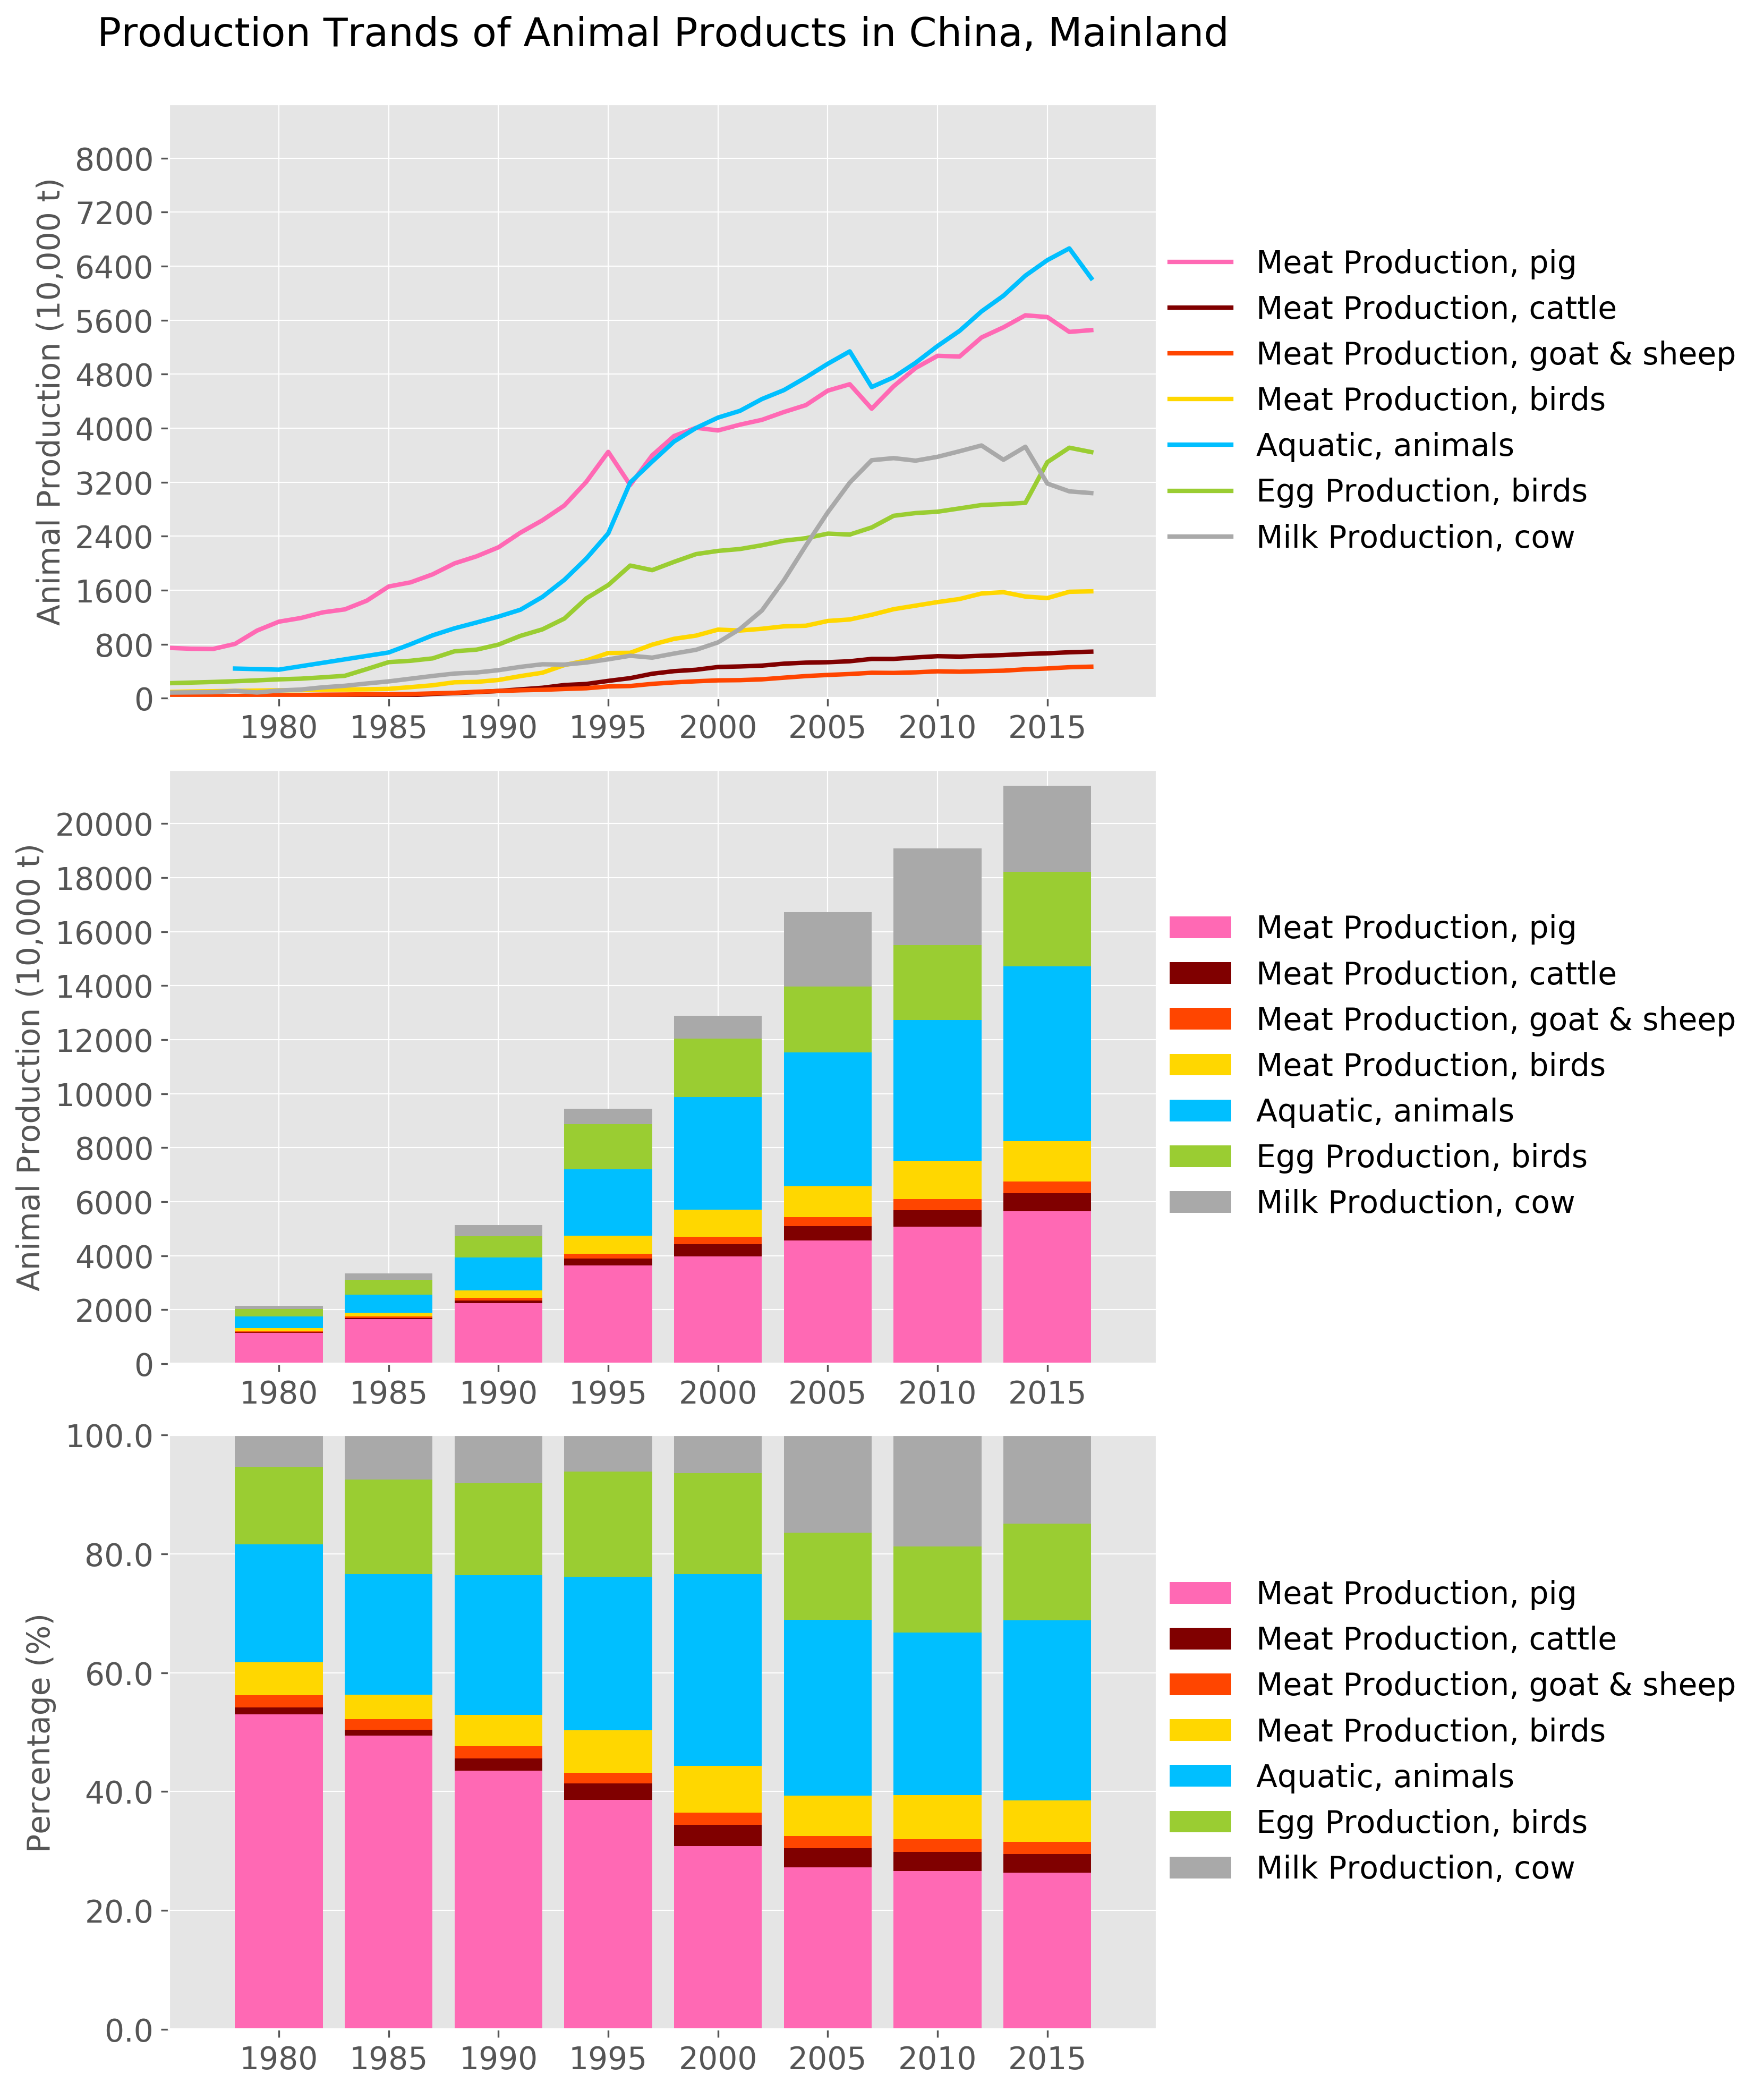

In [42]:
area = 'China, mainland'  # also can be other area name in the 'Area' column
 
plotTrends( 
    domain_=domain,                
    df_=df,
    items_=items,
    area_=area,                                           
    fig_size = (8, 16)
)

### The Production Rankings of Animal Products Sorted by Areas in Mainland China 
### 中国大陆各种动物产品产量按省份排名

- Ranked by the historical total during year 2000 to latest year;
- Show the value during the year 2000 to latest year steped by 5 years.

In [10]:
def toPivot(
    df_,         # dataframe, the gross dataframe
    item_,       # string, the item that should be plot
    sortedVal_,  # int/string, the columns that should be sorted by
):
    """
    extract the data of the particular item from gross dataframe to make a pivot
    where years as columns and areas as indicies
    sort the indecies by values of one column or by 'Historical Total'
    """

    years = range(2000, DATA_YEAR)                          # years
    
    # create a sub dataframe with certain areas during certain years
    df_ = df_.copy()
    df_ = df_[(~df_['Area'].isin(['China, mainland'])) & (df_['Year'].isin(years))]
    # pivot it with a particular item where area as index year as column
    df_ = pd.pivot_table(df_,index=['Area'],columns=['Year'],values=[item_],aggfunc=[np.sum],margins=1)
    
    # flat multi-index
    df_.columns.set_names([None, None, None], inplace=True)    # reset multi index name
    df_.columns = df_.columns.get_level_values(-1)
    
    # fix the columns order and name
    fixed_columns = [df_.columns[-1]] + list(df_.columns[:-1])
    df_ = df_[fixed_columns]
    df_.rename(columns = {'All':'Historical Total'}, inplace=True)
    df_ = df_.drop(index = 'All')
    
    # sort areas by the 'Historical Total'
    sorted_df = df_.sort_values([sortedVal_], ascending=False, axis=0)
    sorted_df = sorted_df.reset_index()
    return sorted_df

In [30]:
def plotRankBar(
    domain_,
    df_,         # dataframe, the gross dataframe
    items_,      # list, the items that should be transfered to pivots by toPivot() and be displayed in the plots
    sortedVal_,  # int/string, the indices should be sorted by values of one column or by 'Historical Total'
    fig_size,
):
    """
    Transfer the gross dataframe to sorted pivots by toPivot()
    Display each pivot as dataframe
    Plot each pivot to a bar plot:
        the X ticks should be the indices sorted by the values of a particular column wich should be a particular year or 'Historical Total'
        the Y axis should be the value of 'Animal Production' in areas in steped years
    Save img
    """
    
    df_ = df_.copy()
    
    # set the colors for the bar
    colors = ['cyan', 'c', 'darkcyan','g']
    
    fig = plt.figure(figsize = fig_size, dpi = 300)
    fig.tight_layout()                          
    plt.subplots_adjust(wspace =0.2, hspace =1)
    
    years = list(range(2000, DATA_YEAR, 5))                                 # years for displaying bars
    Y_lab = domain_+' (10,000 t)'                                           # Y label 

    n=0
    for i in items_:
        pivot = toPivot(df_, i, sortedVal_)

        n+=1
        fig.add_subplot(len(items_),1,n)

        title = "{} in Different Areas Ranked by {}".format(i.title(), sortedVal_)  # titles        
        plt.title(title, fontsize=TIT_size)
        
        print(i)
        display(pivot[['Area']+years].head())                               # display pivots
        pivot[['Area']+years].plot.bar(x='Area', width=1, color=colors, ax=plt.gca())

        ax=plt.gca()
        Y_max=pivot[years].values.max()
        setY_quant(ax, 1.2*Y_max, Y_lab)
        X_ticks=pivot['Area'].values
        setX_quali(ax, X_ticks)

    path = './results/img/CN_AnimalProduction/'+'The Production Rankings of Animal Products Sorted by Areas in Mainland China'+'.png'
    bbox = matplotlib.transforms.Bbox([[-0, -0], [12, 40]])
    fig.savefig(path, format='png', transparent=False, dpi=300, bbox_inches =bbox)
    print('Img saved as: ' + path)

Meat Production, pig


Area      2000       2005        2010        2015
0   Sichuan  419.1007  513.68700  492.213873  512.416541
1     Hunan  371.7571  436.96840  412.411923  448.021800
2     Henan  322.8812  440.82520  408.291177  467.962000
3  Shandong  285.8800  367.05339  353.209893  397.443600
4     Hebei  242.8362  337.36960  245.191462  275.031204

Meat Production, cattle


Area     2000        2005       2010       2015
0      Henan  83.0000  100.783000  83.046330  82.600000
1   Shandong  69.1800   80.721967  68.656879  67.871439
2      Hebei  65.2916   86.859300  58.081073  53.190669
3      Jilin  33.5449   51.002300  43.241880  46.588147
4  Neimenggu  21.8440   33.597300  49.708380  52.894979

Meat Production, goat & sheep


Area     2000      2005       2010       2015
0  Neimenggu  31.8166  72.43180  89.200000  92.591769
1   Xinjiang  37.4966  59.89000  46.950000  55.433086
2   Shandong  24.8000  36.35506  32.670000  37.092092
3      Henan  32.0000  46.66120  25.200000  25.900000
4      Hebei  24.5944  33.72790  29.305334  31.672589

Meat Production, birds


Area        2000        2005        2010        2015
0   Shandong  146.459191  232.927694  219.076509  237.322704
1  Guangdong  124.652149  135.527073  152.580940  130.702700
2      Henan   58.858851   92.932252  114.171988  122.822978
3    Jiangsu   76.840229   82.784727  107.918816   98.656568
4   Liaoning   51.032686   73.462818   96.561225  116.039206

Aquatic, animals


Area      2000      2005      2010      2015
0   Shandong  652.3496  682.3286  730.7784  864.5306
1  Guangdong  590.7747  691.3175  722.4278  849.9246
2     Fujian  496.1104  555.3856  527.0210  644.2178
3   Zhejiang  466.7919  480.3070  473.5031  592.6878
4    Jiangsu  307.9486  386.7872  457.4495  518.1195

Egg Production, birds


Area   2000      2005        2010        2015
0  Shandong  366.2  441.8334  384.282945  423.900000
1     Hebei  357.0  458.9667  339.083517  373.594184
2     Henan  270.0  375.3000  388.592750  410.000000
3  Liaoning  140.3  224.0456  275.725656  276.500000
4   Jiangsu  181.4  182.0050  190.570800  196.230000

Milk Production, cow


Area      2000      2005        2010       2015
0     Neimenggu   79.7774  691.0481  905.177130  803.20000
1  Heilongjiang  154.2992  440.2393  552.491500  570.47834
2         Hebei   84.1984  340.3456  439.761000  473.13690
3      Shandong   45.7300  187.0747  253.051181  275.38000
4         Henan   16.0972  104.0000  290.911512  342.20000

Img saved as: ./results/img/CN_AnimalProduction/The Production Rankings of Animal Products Sorted by Areas in Mainland China.png


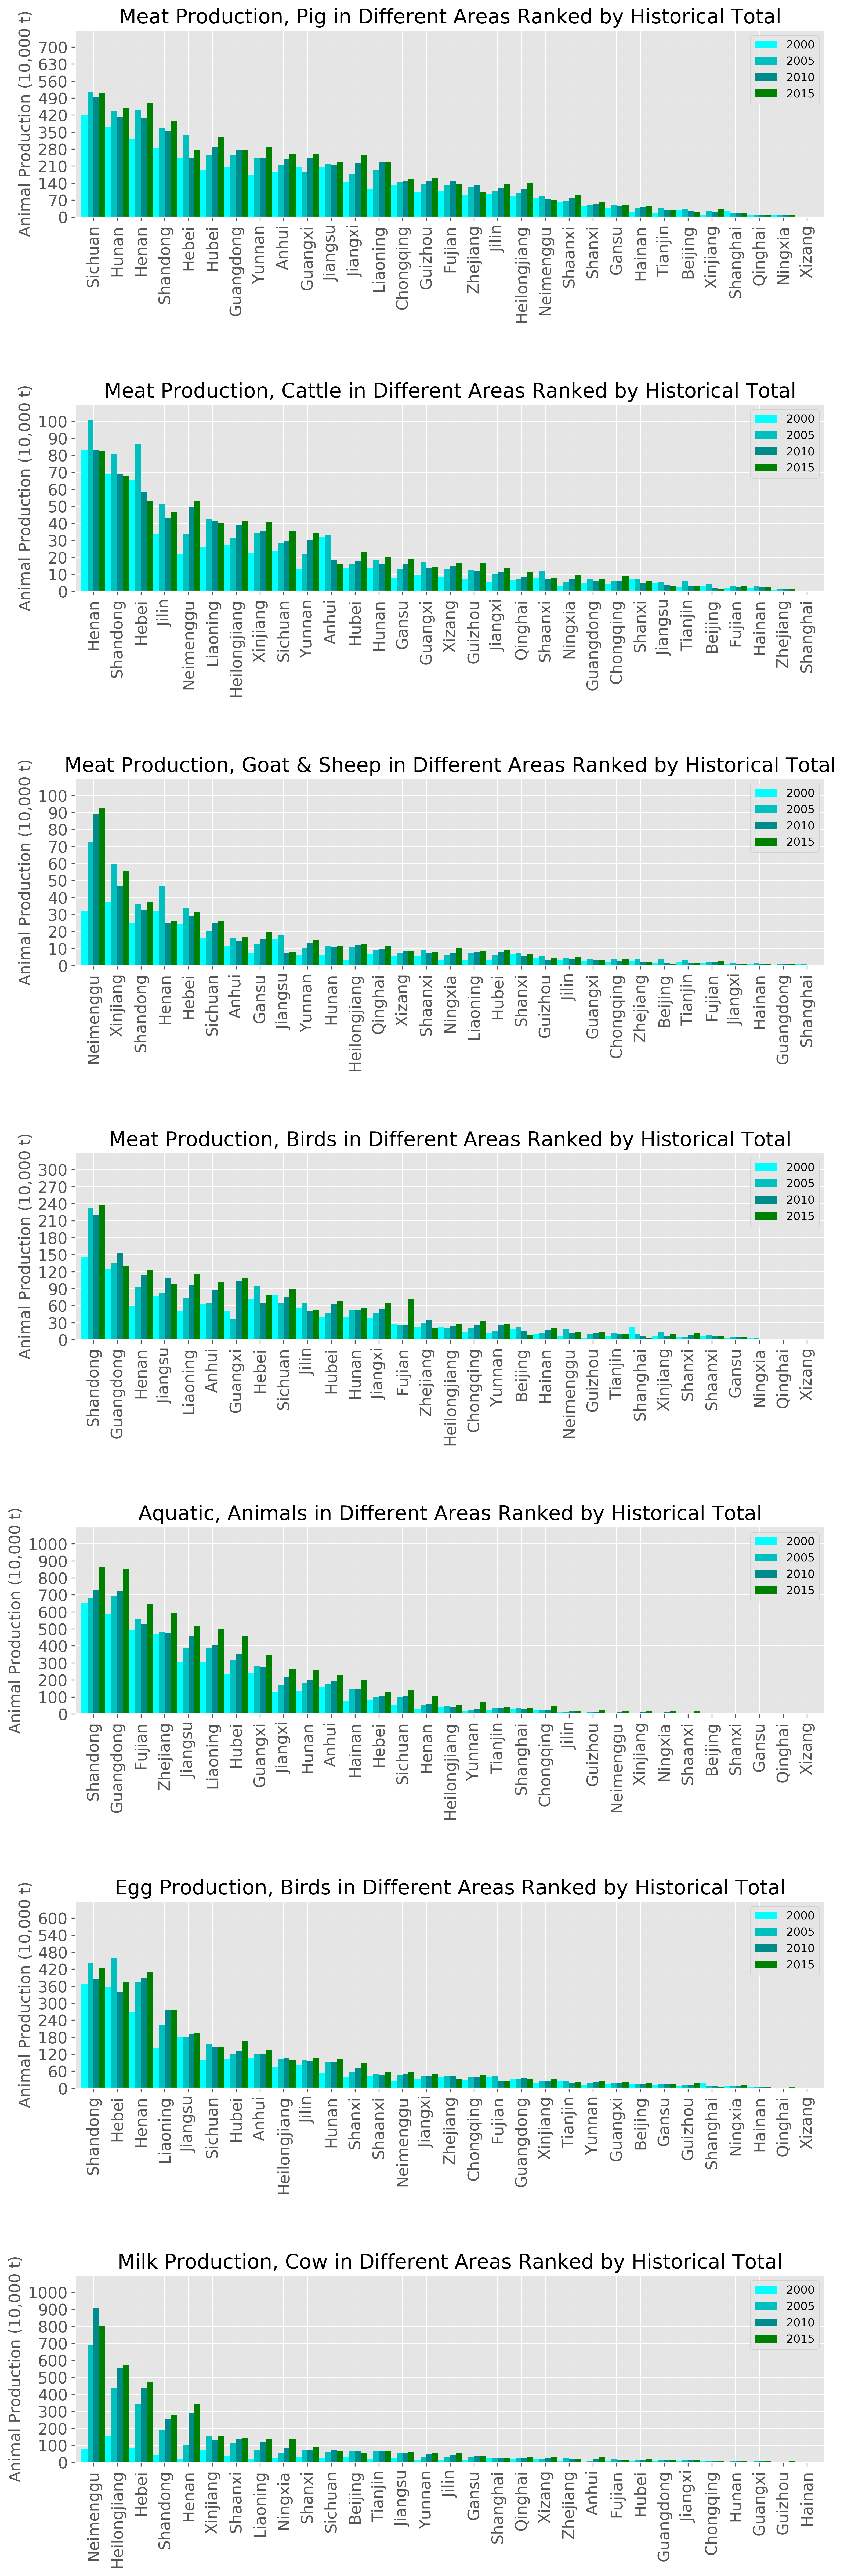

In [31]:
"""
Visualize the Animal Production in Different Area and Sorted by Historical total:
the domain and items is the same as above
the sorted Value: the Areas in X axis should be sorted by 'Historical Total'
"""
sortedVal = 'Historical Total'     # also can be an int between 2000 and DATA_YEAR

plotRankBar(
    domain_=domain,
    df_=df, 
    items_=items,
    sortedVal_=sortedVal,
    fig_size=(12,40)
)

### Animal Production Atlas in Mainland China
### 中国大陆动物产品产量地图

- Display the data of particular animal product in particular year by color maps;
- The values linspace are divided into six levels linearly, each color represent a level, the darker the greater.

In [11]:
def plotAtlas(
    df_,           # dataframe, the gross dataframe
    items_,         # string, selected item
    year_,         # int, selected year
    geo_data_,     # geojson file
    fill_color_,   # string, select a fill_color strategy in folium
    tag_,          # string, for recognization when giving title and saving files
):

    df_ = df_.copy()
    
    # create a dict of sub dataframes that made of 
    # a particular year, a particular item, ertain areas
    # and sorted by item value
    dfs = {}
    df_sorted = pd.DataFrame([])
    for i in items_:
        dfs[i] = df_[df_['Year']==year_][['Area',i]]
        dfs[i] = dfs[i].sort_values([i],ascending=False).reset_index(drop=True)
        df_sorted = pd.concat([df_sorted, dfs[i]], axis=1, join='outer', ignore_index=False)
    display(df_sorted)
   
    for i in items_:
        title = "{} {} {}".format(str(year_), i, tag_)
        cn_map = folium.Map( width=1000, height=600, location=[40, 105], zoom_start=4, tiles='Mapbox Bright') 
        
        dfs[i] = dfs[i][~dfs[i]['Area'].isin(['China, mainland'])]
        threshold_scale = np.linspace(
            dfs[i][i].values.min(), 
            dfs[i][i].values.max(), 
            6, dtype=int)
        threshold_scale = threshold_scale.tolist()      # change the numpy array to a list
        threshold_scale[-1] = threshold_scale[-1] + 1   # make sure that the last value of the list is greater than the maximum immigration
        
        folium.Choropleth(
            geo_data=geo_data_,
            data=dfs[i],
            name = i,
            columns=['Area', i],
            key_on='feature.properties.NAME',
            threshold_scale=threshold_scale,
            nan_fill_color='gray',
            fill_color=fill_color_,
            fill_opacity=1, 
            line_opacity=0.2,
            legend_name=title,
            show=False,
            highlight=False,
            reset=False
        ).add_to(cn_map)
        
        path = './results/map/CN_AnimalProduction/'+title+'.html'
        cn_map.save(path)
#         display(cn_map)
        print('Atalas saved as: ' + path)

__注意：下个cell输出结果为地图，不能直接在文本中显示地图，请根据结果输出的地址自行查看__

In [12]:
"""
Plot Atlas:
the items is same as above
the years: an integer between 1999 and the latest year
a blank map named 'cn_provinces.geojson' should be already in the current dir
"""

year = DATA_YEAR-1    # also can be an int between 2000 and DATA_YEAR, but when use DATA_year, some atla my not work because lack of data 

plotAtlas(
    df_=df, 
    items_=items, 
    year_=year, 
    geo_data_ = r'cn_provinces.geojson',
    fill_color_='GnBu',
    tag_='(10,000 t)'
)

Area  Meat Production, pig             Area  \
0   China, mainland           5425.500000  China, mainland   
1           Sichuan            494.481962            Henan   
2             Henan            450.647406         Shandong   
3             Hunan            434.800000        Neimenggu   
4          Shandong            383.533074            Hebei   
5             Hubei            322.169706            Jilin   
6            Yunnan            283.676548     Heilongjiang   
7             Hebei            265.405112         Xinjiang   
8         Guangdong            264.384323         Liaoning   
9           Guangxi            249.752958          Sichuan   
10            Anhui            244.855654           Yunnan   
11          Jiangxi            242.885158            Hubei   
12         Liaoning            219.170800            Hunan   
13          Jiangsu            216.358744            Gansu   
14          Guizhou            154.962084          Guizhou   
15        Chongqing            151.309350            Anhui   
16     Heilongjiang            138.152859           Xizang   
17           Fujian            136.003093          Guangxi   
18            Jilin            130.560200          Jiangxi   
19         Zhejiang             90.730000          Qinghai   
20          Shaanxi             85.899000          Ningxia   
21        Neimenggu             72.082340        Chongqing   
22           Shanxi             57.523910          Shaanxi   
23            Gansu             48.971200        Guangdong   
24           Hainan             42.855977           Shanxi   
25         Xinjiang             33.903536          Tianjin   
26          Tianjin             29.178697           Fujian   
27          Beijing             21.841667          Jiangsu   
28         Shanghai             13.540000           Hainan   
29          Qinghai             10.505149          Beijing   
30          Ningxia              7.465858         Zhejiang   
31           Xizang              1.543281         Shanghai   

    Meat Production, cattle             Area  Meat Production, goat & sheep  \
0                680.900000  China, mainland                     459.360000   
1                 83.013000        Neimenggu                      98.980602   
2                 66.989110         Xinjiang                      58.315606   
3                 55.592623         Shandong                      38.390316   
4                 54.254482            Hebei                      32.365607   
5                 47.100617          Sichuan                      26.887299   
6                 42.535908            Henan                      26.443900   
7                 42.479069            Gansu                      21.050000   
8                 41.598910            Anhui                      17.347000   
9                 36.858164           Yunnan                      15.133360   
10                35.241882     Heilongjiang                      12.810000   
11                23.173771          Qinghai                      11.981629   
12                20.399753            Hunan                      11.971200   
13                20.020000          Ningxia                      10.523526   
14                17.850000            Hubei                       8.887617   
15                16.491600         Liaoning                       8.700000   
16                16.178727          Jiangsu                       8.260000   
17                14.714982           Xizang                       8.229700   
18                14.410000          Shaanxi                       7.994600   
19                12.181040           Shanxi                       7.428871   
20                10.423936            Jilin                       4.814102   
21                 9.170000          Guizhou                       4.498200   
22                 8.028000        Chongqing                       4.120000   
23                 7.073110          Guangxi                       3.264

Atalas saved as: ./results/map/CN_AnimalProduction/2016 Meat Production, pig (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Meat Production, cattle (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Meat Production, goat & sheep (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Meat Production, birds (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Aquatic, animals (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Egg Production, birds (10,000 t).html
Atalas saved as: ./results/map/CN_AnimalProduction/2016 Milk Production, cow (10,000 t).html


### Van Diagram of Top Areas
### 总产量领先地区的韦恩图

In [13]:
def drawVenn2(set1,set2,set1_name,set2_name):
    fig_size = (8, 4)
    fig = plt.figure(figsize=fig_size, dpi=300)
    v0 = venn2([set1, set2], (set1_name, set2_name))

    try:
        v0.get_patch_by_id('10').set_color('red')
    except:pass
    try:
        v0.get_patch_by_id('01').set_color('blue')
    except:pass
    try:
        v0.get_patch_by_id('11').set_color('purple')
    except:pass

    try:
        v0.get_label_by_id('10').set_text('\n\n '.join(set1.difference(set2)))
    except:pass
    try:
        v0.get_label_by_id('01').set_text('\n\n '.join(set2.difference(set1)))
    except:pass
    try:
        v0.get_label_by_id('11').set_text('\n\n '.join(set1.intersection(set2)))
    except:pass

    for text in v0.subset_labels:
        try:
            text.set_fontsize(10)
        except:
            continue

    for text in v0.set_labels:
        try:
            text.set_fontsize(10)
        except:
            continue
    
    path = './results/img/CN_AnimalProduction/'+'venn_'+set1_name+'_'+set2_name+'.png'
    fig.savefig(path)
    print('Img saved as: ' + path)
    
def drawVenn3(set1, set2, set3, set1_name, set2_name, set3_name):
    fig_size = (8, 4)
    fig = plt.figure(figsize=fig_size, dpi=300)
    v1 = venn3([set1, set2, set3], (set1_name, set2_name, set3_name))

    try:
        v1.get_patch_by_id('100').set_color('red')
    except:pass
    try:
        v1.get_patch_by_id('010').set_color('yellow')
    except:pass
    try:
        v1.get_patch_by_id('001').set_color('blue')
    except:pass
    try:    
        v1.get_patch_by_id('110').set_color('orange')
    except:pass
    try:    
        v1.get_patch_by_id('101').set_color('purple')
    except:pass
    try:    
        v1.get_patch_by_id('011').set_color('green')
    except:pass
    try:    
        v1.get_patch_by_id('111').set_color('grey')
    except:pass

    try:    
        v1.get_label_by_id('100').set_text('\n\n\n\n\n'+'\n\n '.join(set1.difference(set2.union(set3))))
    except:pass  
    try:
        v1.get_label_by_id('010').set_text('\n\n '.join(set2.difference(set1.union(set3)))+'\n\n\n\n\n')
    except:pass
    try:
        v1.get_label_by_id('001').set_text('\n\n '.join(set3.difference(set2.union(set1))))
    except:pass
    try:
        v1.get_label_by_id('110').set_text('\n\n '.join((set1.intersection(set2)).difference(set3)))
    except:pass
    try:
        v1.get_label_by_id('101').set_text('\n\n '.join((set1.intersection(set3)).difference(set2)))
    except:pass
    try:
        v1.get_label_by_id('011').set_text('\n\n '.join((set3.intersection(set2)).difference(set1)))
    except:pass
    try:
        v1.get_label_by_id('111').set_text('\n\n '.join(((set1.intersection(set2)).intersection(set3))))
    except:pass

    for text in v1.subset_labels:
        try:
            text.set_fontsize(10)
        except:continue

    for text in v1.set_labels:
        try:
            text.set_fontsize(10)
        except:continue
    
    path = './results/img/CN_AnimalProduction/'+'venn_'+set1_name+'_'+set2_name+'_'+set3_name+'.png'
    fig.savefig(path)
    print('Img saved as: ' + path)

__地图颜色将等级区分为五级，按等级自上而下，选取合适的数量，具体方法如下:__
   ```
   if (first > 3): top = first
   elif (first + second > 3): top = first + second
   elif (first + second + third > 6): top = first + second
   else: top = first + second + third
   ```
   注： top 指被选为 top 的地方； first 是图例上最深的颜色，sencond 和 third 依次类推

In [14]:
top_pig={'Sichuan', 'Henan', 'Hunan', 'Shandong', 'Hubei'}
top_cattle={'Henan', 'Shandong', 'Neimenggu', 'Hebei'}
top_shp_gt={'Neimenggu', 'Xinjiang'}

top_poultry={'Shandong', 'Guangdong', 'Henan', 'Liaoning', 'Guangxi', 'Anhui'}
top_aquatic={'Shandong', 'Guangdong', 'Fujian', 'Zhejiang'}

top_egg={'Shandong', 'Henan', 'Hebei', 'Liaoning'}
top_milk={'Neimenggu', 'Heilongjiang', 'Hebei', 'Henan'}

Img saved as: ./results/img/CN_AnimalProduction/venn_Pork Meat_Bovine Meat_Mutton & Goat Meat.png


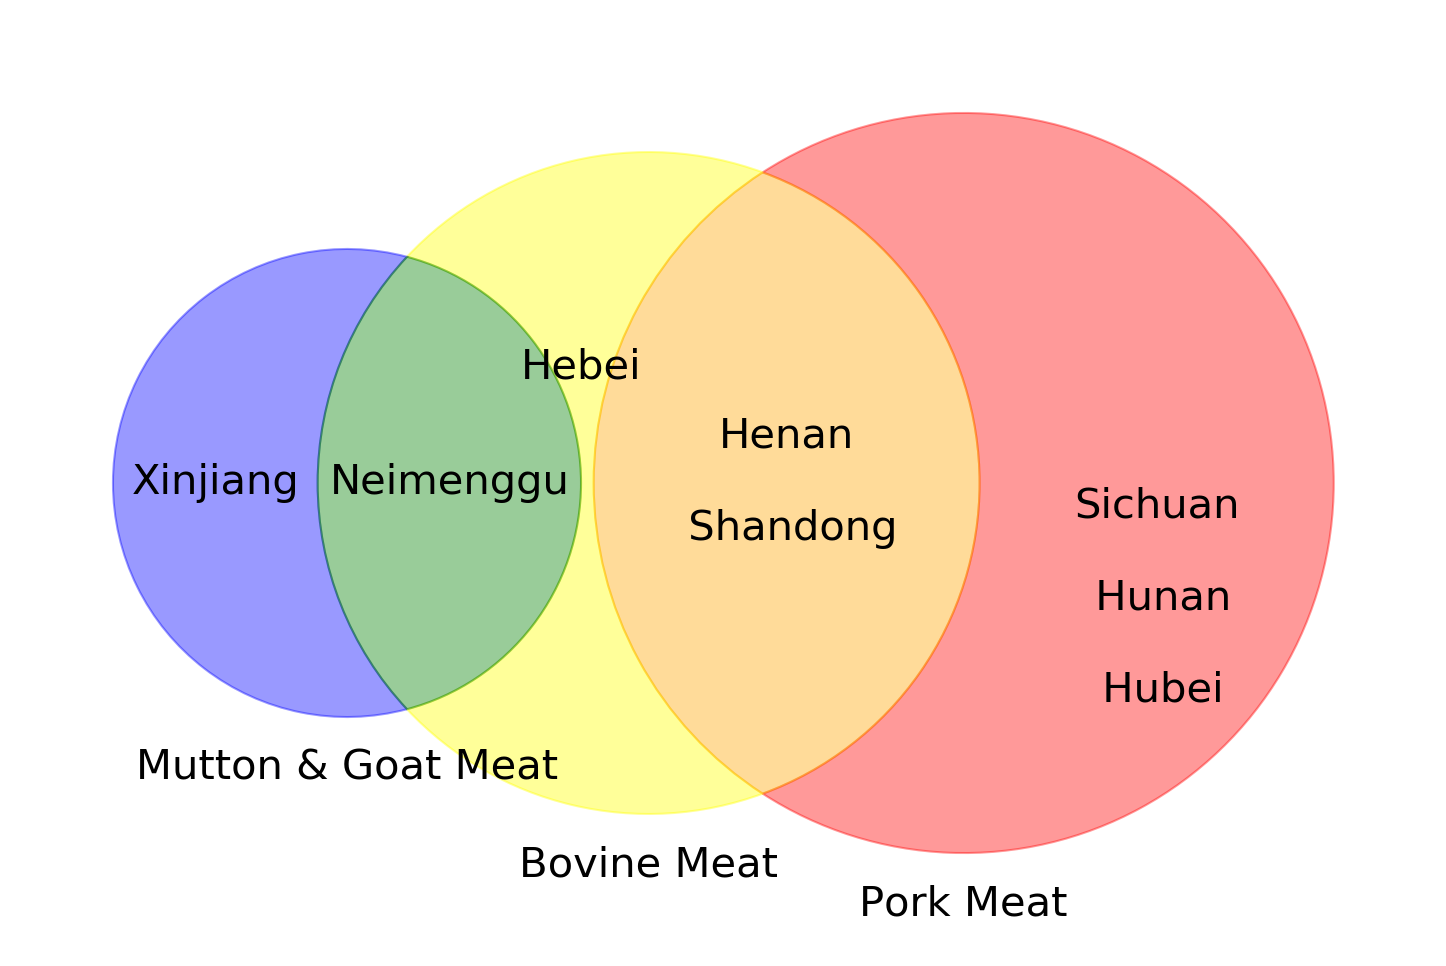

In [15]:
set1=top_pig
set2=top_cattle
set3=top_shp_gt
set1_name='Pork Meat'
set2_name='Bovine Meat'
set3_name='Mutton & Goat Meat'

drawVenn3(set1, set2, set3, set1_name, set2_name, set3_name)

Img saved as: ./results/img/CN_AnimalProduction/venn_Poultry Meat_Aquatic Meat.png


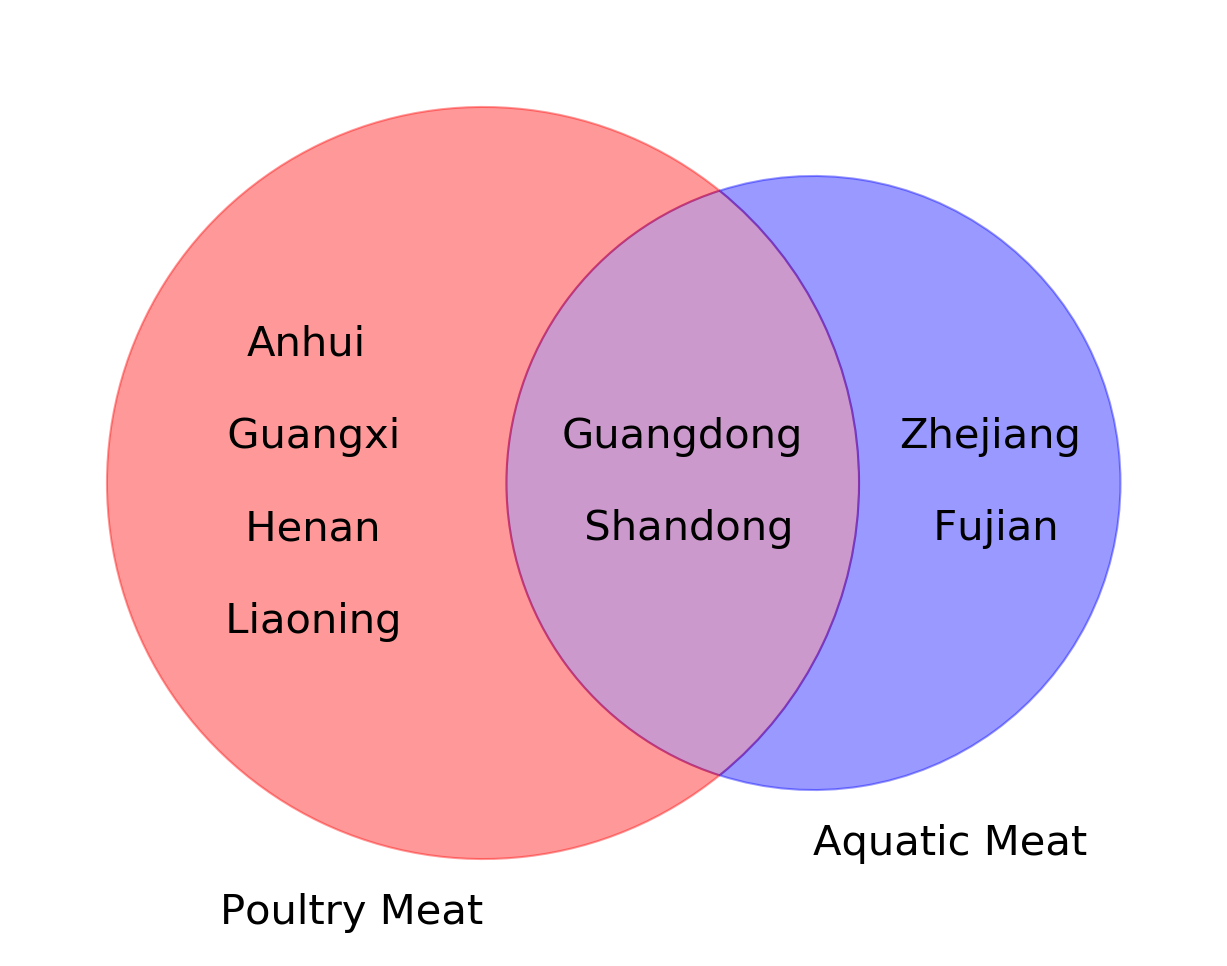

In [16]:
set1=top_poultry
set2=top_aquatic
set1_name='Poultry Meat'
set2_name='Aquatic Meat'

drawVenn2(set1,set2,set1_name,set2_name)

Img saved as: ./results/img/CN_AnimalProduction/venn_Egg_Milk.png


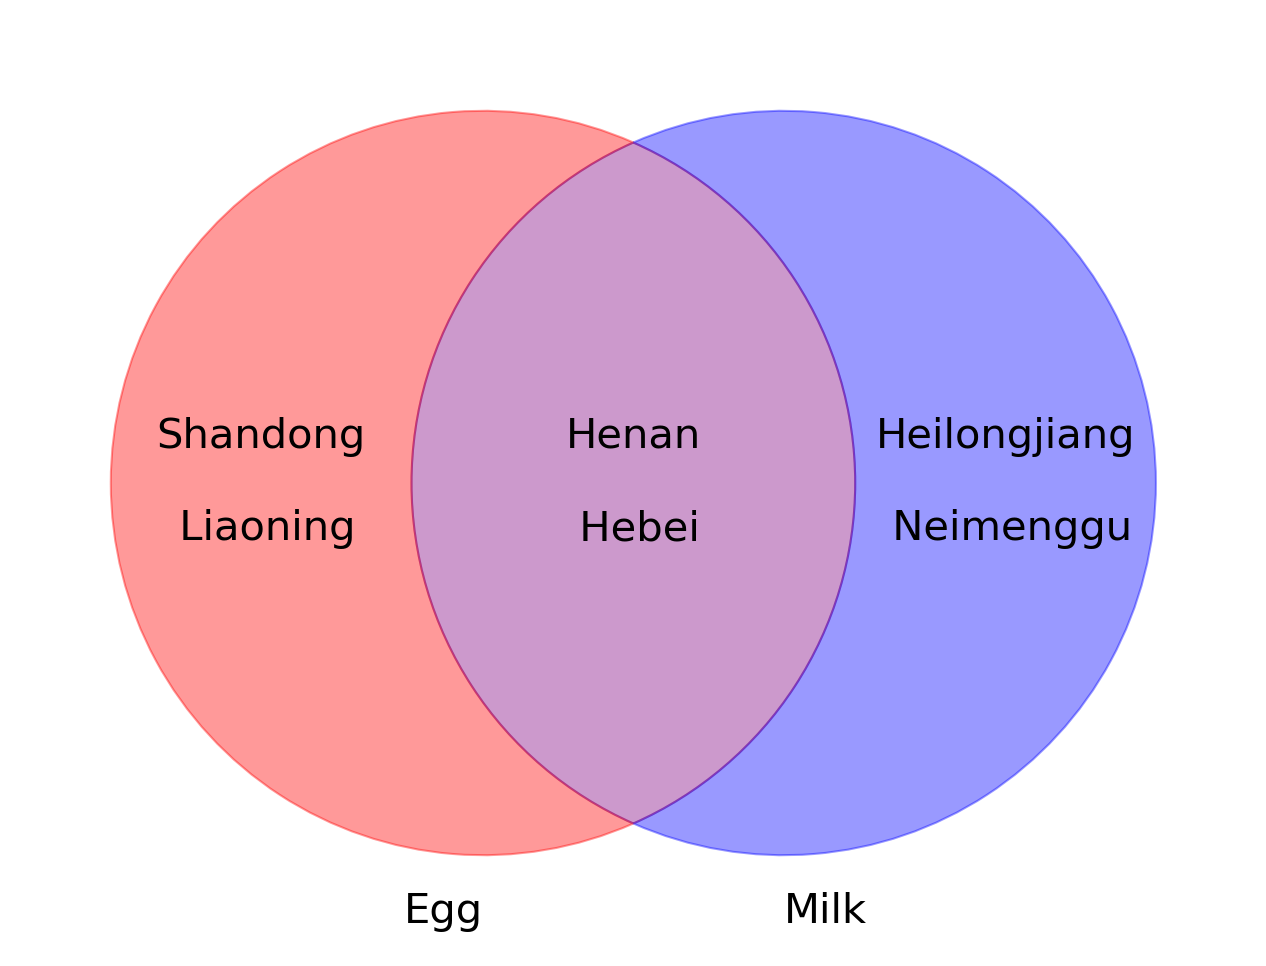

In [17]:
set1=top_egg
set2=top_milk
set1_name='Egg'
set2_name='Milk'

drawVenn2(set1,set2,set1_name,set2_name)

Img saved as: ./results/img/CN_AnimalProduction/venn_Red Meat_White Meat_Egg & Milk.png


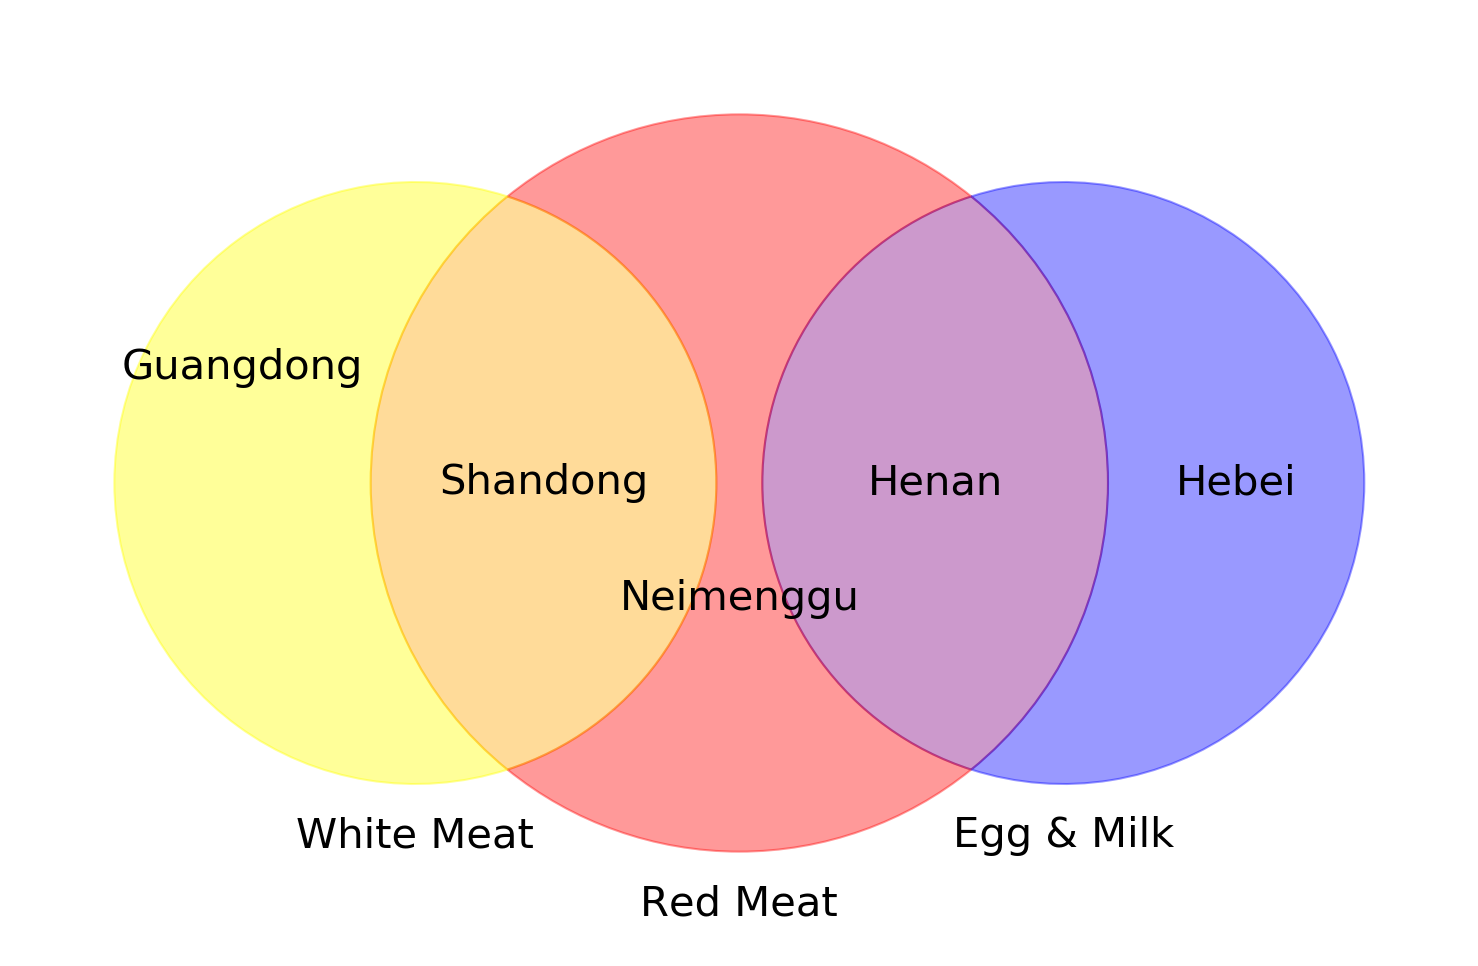

In [18]:
top_red={'Shandong','Henan','Neimenggu'}
top_white={'Guangdong', 'Shandong'}
top_egg_milk={'Hebei', 'Henan'}

set1=top_red
set2=top_white
set3=top_egg_milk
set1_name='Red Meat'
set2_name='White Meat'
set3_name='Egg & Milk'
drawVenn3(set1,set2,set3,set1_name,set2_name,set3_name)

### Productivity Evaluation
### 生产效率评估

In [28]:
def plotProductivity(
    df_, 
    area_, 
    fig_size,
):
    
    items = ['pig', 'cattle', 'goat & sheep', 'birds']
    df_=df_.copy()
    
    for i in items:

        # items name
        item11 = 'Stock, '+i
        item12 = 'Slaughtered, '+i
        item2 = 'Meat Production, '+i
        item3 = 'Meat Yield, '+i
        
        # df made of selected items
        df_res = df_[df_['Area']==area_][['Year',item11,item12,item2,item3]]
        
        # canvas and axes
        fig, ax = plt.subplots(figsize=fig_size, dpi = 300)
        title = 'Productivity of {} Production'.format(i.title())
        plt.title(title, fontsize=TIT_size)
        ax2, ax3=ax.twinx(),ax.twinx()
        rspine = ax3.spines['right']
        rspine.set_position(('axes', 1.2))
        ax3.set_frame_on(True)
        ax3.patch.set_visible(False)
        fig.subplots_adjust(right=0.75)

        # === Stock & Slaughtered
        df_res[['Year',item11,item12]].plot(x='Year', ax=ax)
        ax.legend(loc = 'upper left')
        Y_max=df_res[[item11,item12]].values.max()
        setY_quant(ax, 1.5*Y_max, 'Stock or Slaughtered (10,000 heads)')

        # === Meat Production
        df_res[['Year',item2]].plot(x='Year', c='green', ls=':', ax=ax2)
        ax2.legend(loc = 'upper right')
        Y_max=df_res[[item2]].values.max()
        setY_quant(ax2,1.1*Y_max , 'Meat Production (10,000 t)')

        # === Meat Yield
        df_res[['Year',item3]].plot(x='Year', c='orange', ls='-.', ax=ax3)
        ax3.legend(loc = 'lower right')
        Y_max=df_res[[item3]].values.max()
        setY_quant(ax3, 1.1*Y_max, 'Meat Yield (kg/head)')
        
        # draw X ticks
        step=10
        X_ticks= list(range(1965,2025,step))
        setX_quant(ax, X_ticks ,step)

        # === Save img
        path = './results/img/CN_AnimalProduction/'+'productivity_'+i+'.png'
        bbox = matplotlib.transforms.Bbox([[-2, -0], [10, 5]])
        fig.savefig(path, format='png', transparent=False, dpi=300, bbox_inches =bbox)
        print('Img saved as: ' + path)

Img saved as: ./results/img/CN_AnimalProduction/productivity_pig.png
Img saved as: ./results/img/CN_AnimalProduction/productivity_cattle.png
Img saved as: ./results/img/CN_AnimalProduction/productivity_goat & sheep.png
Img saved as: ./results/img/CN_AnimalProduction/productivity_birds.png


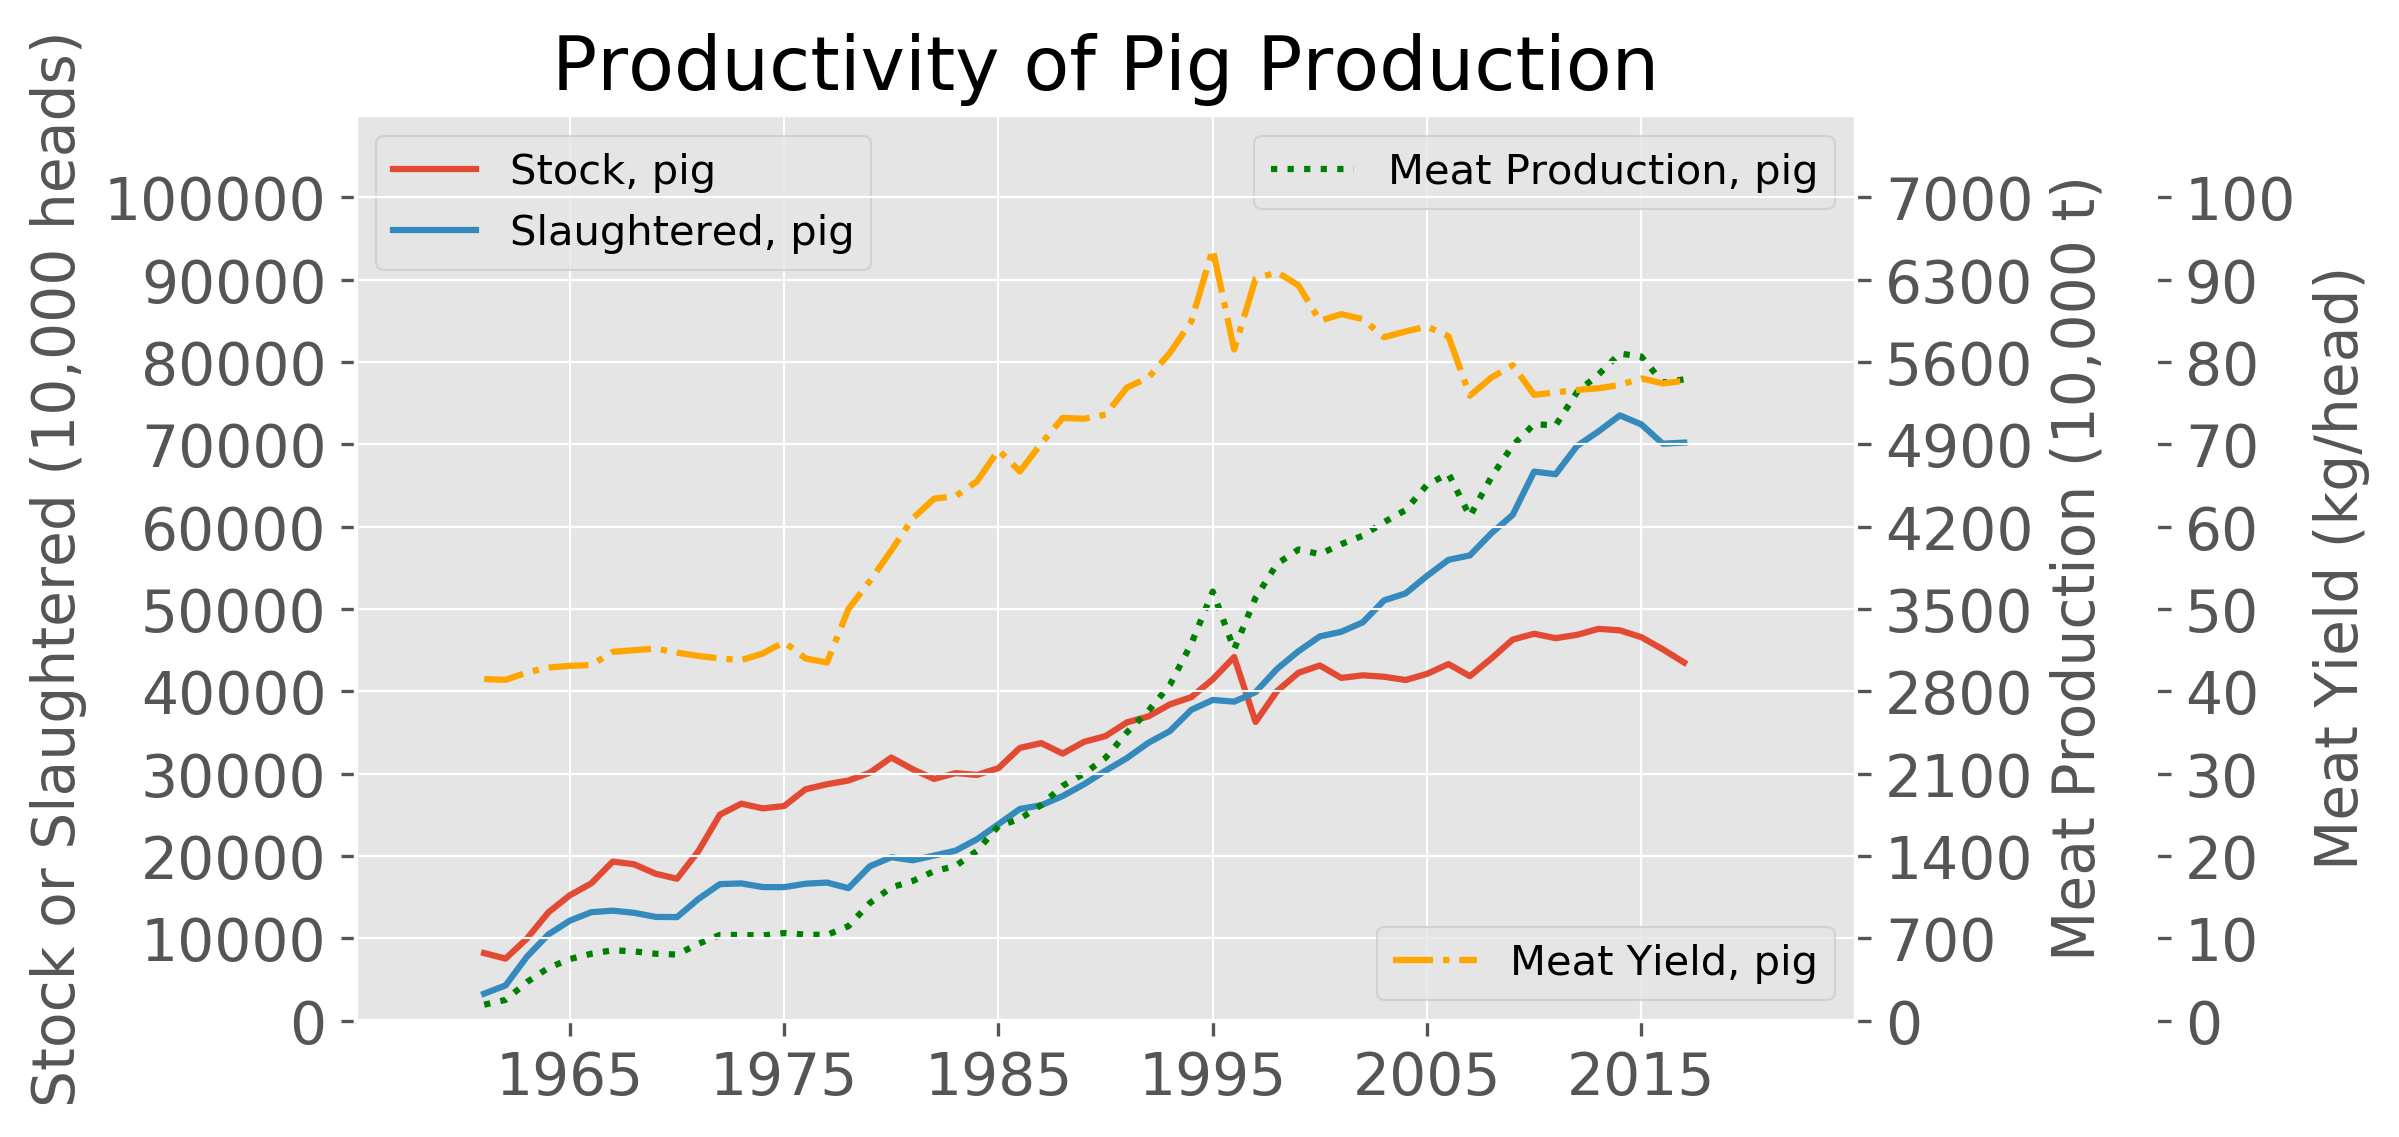

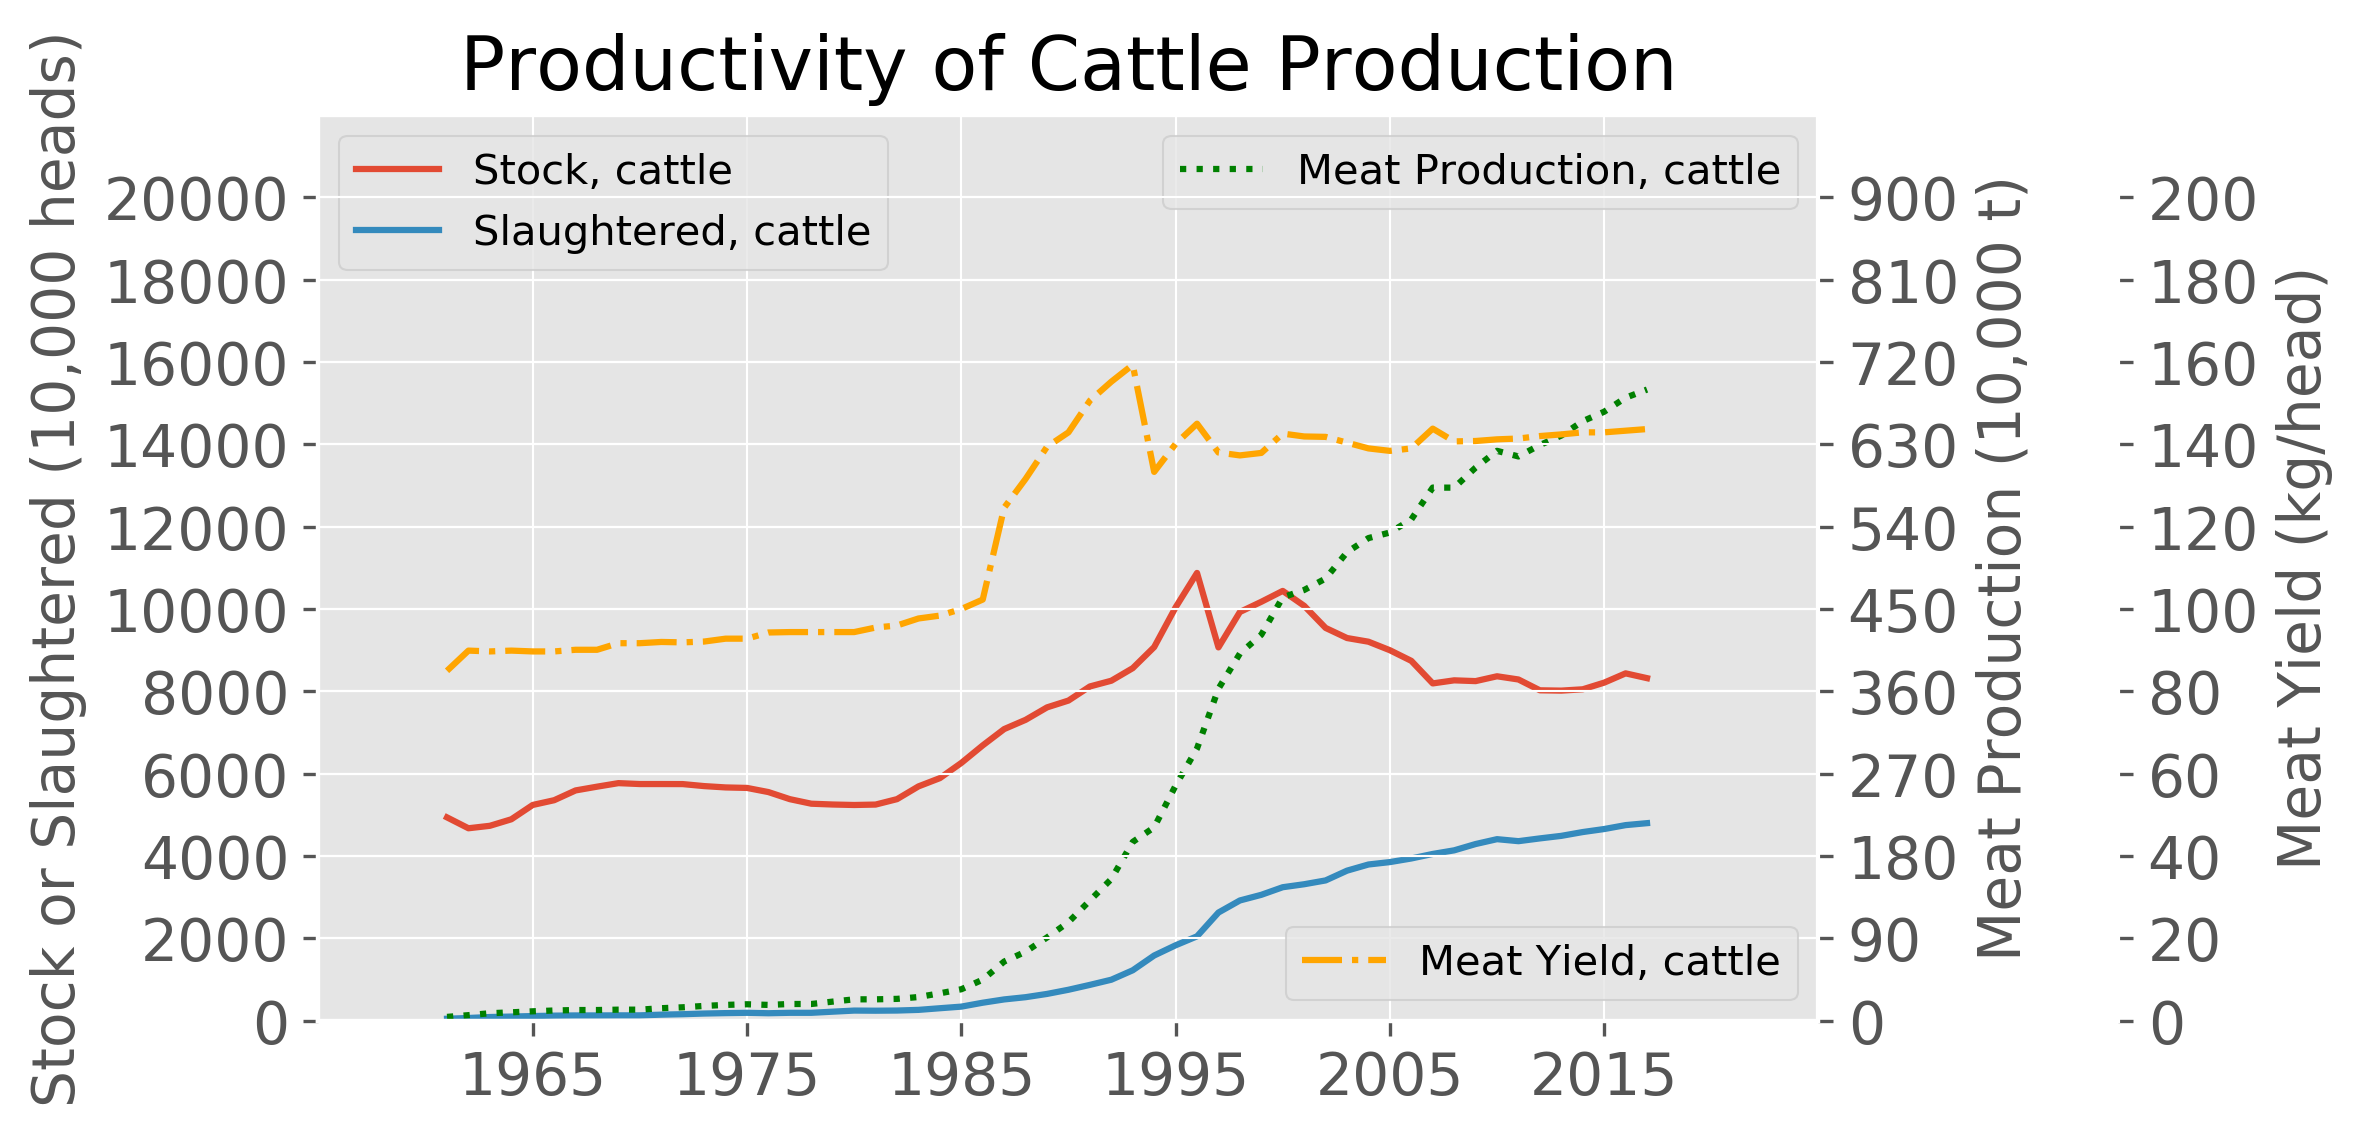

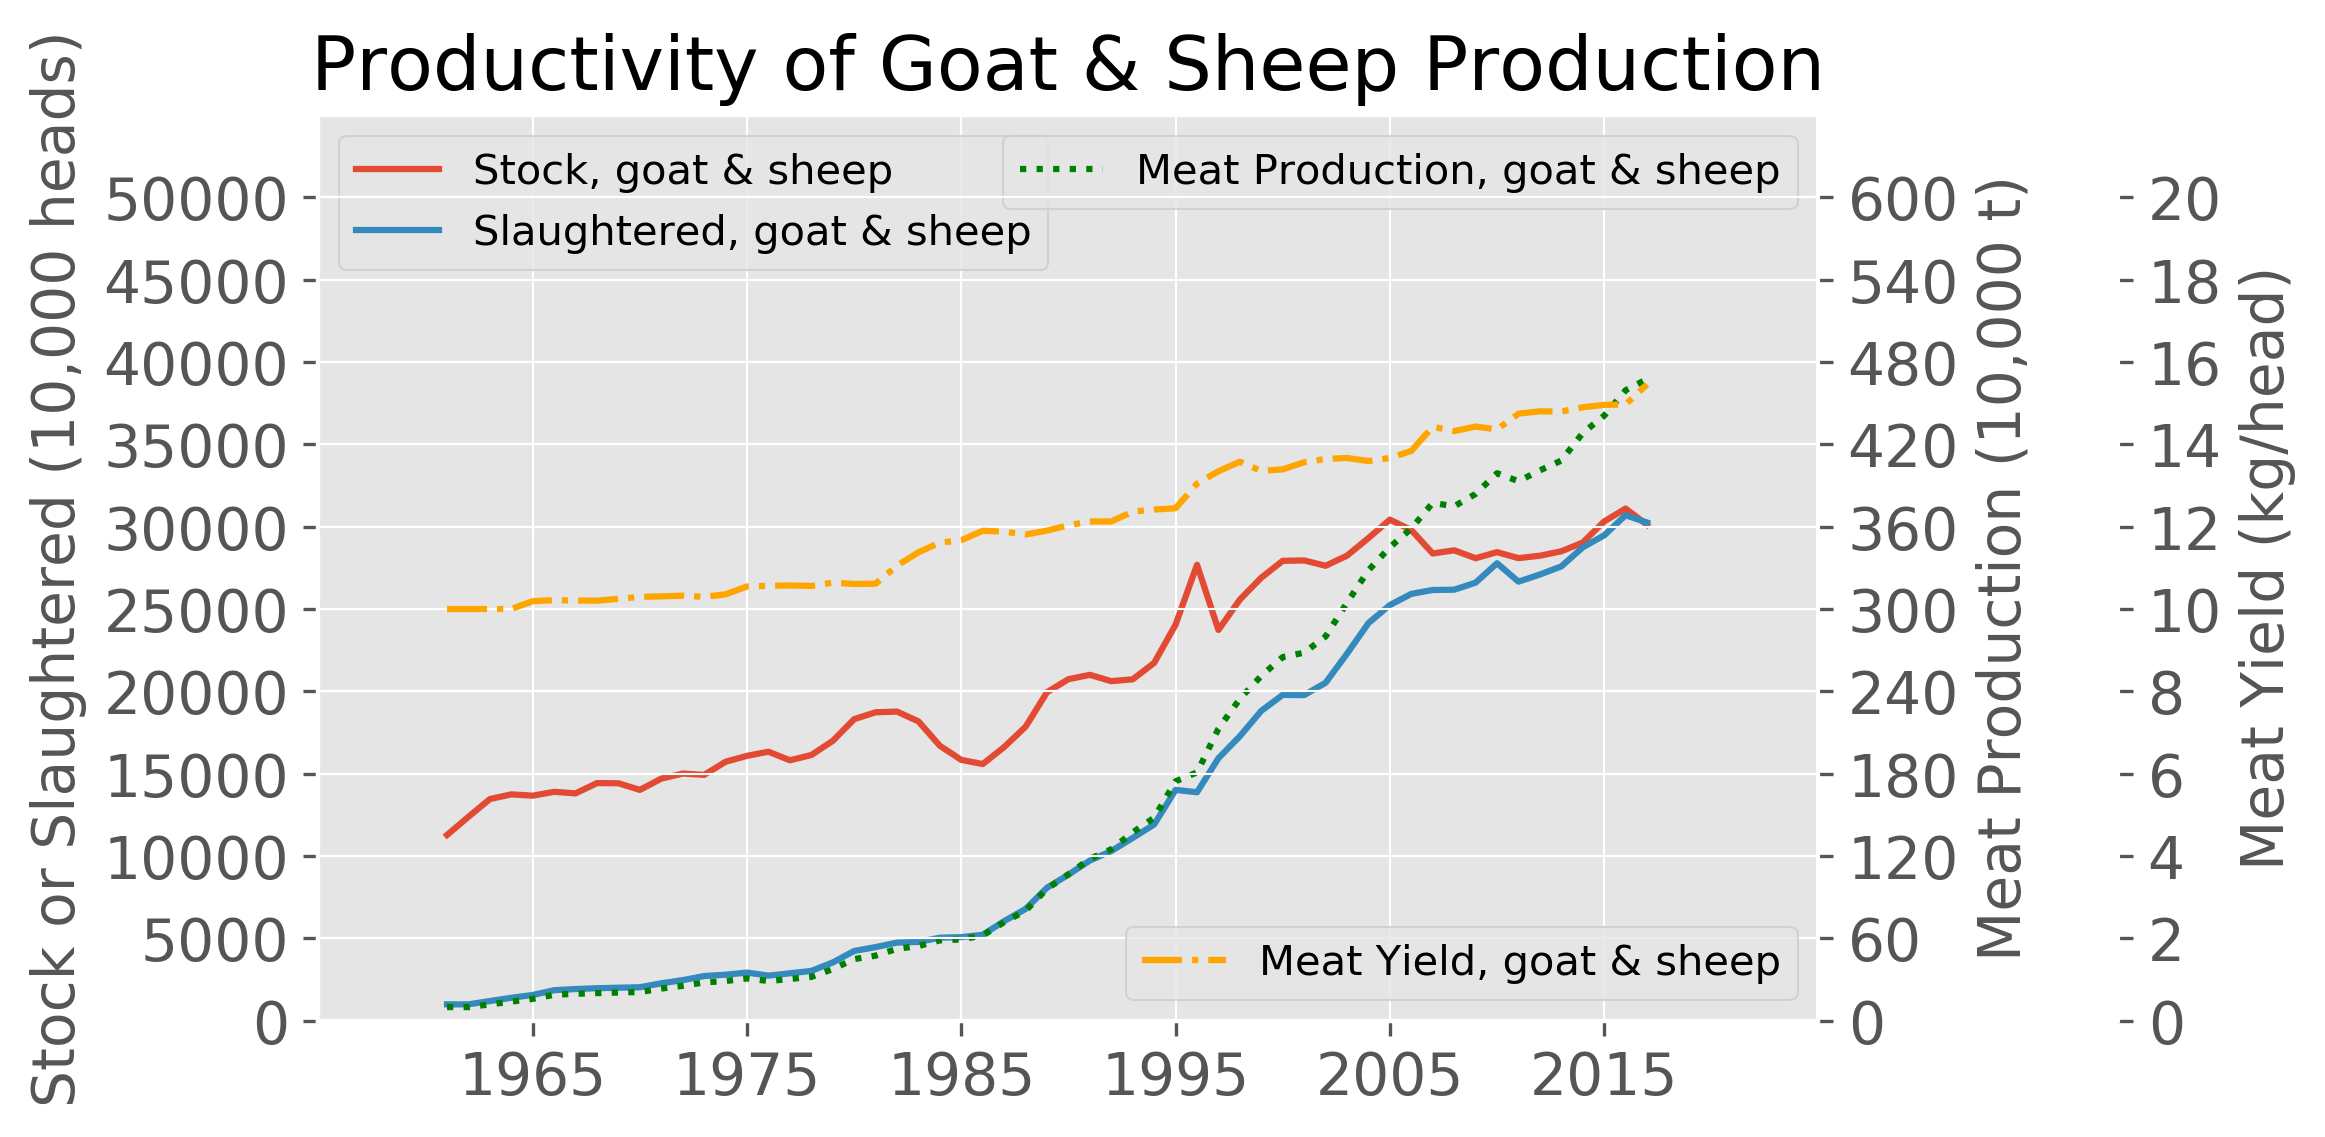

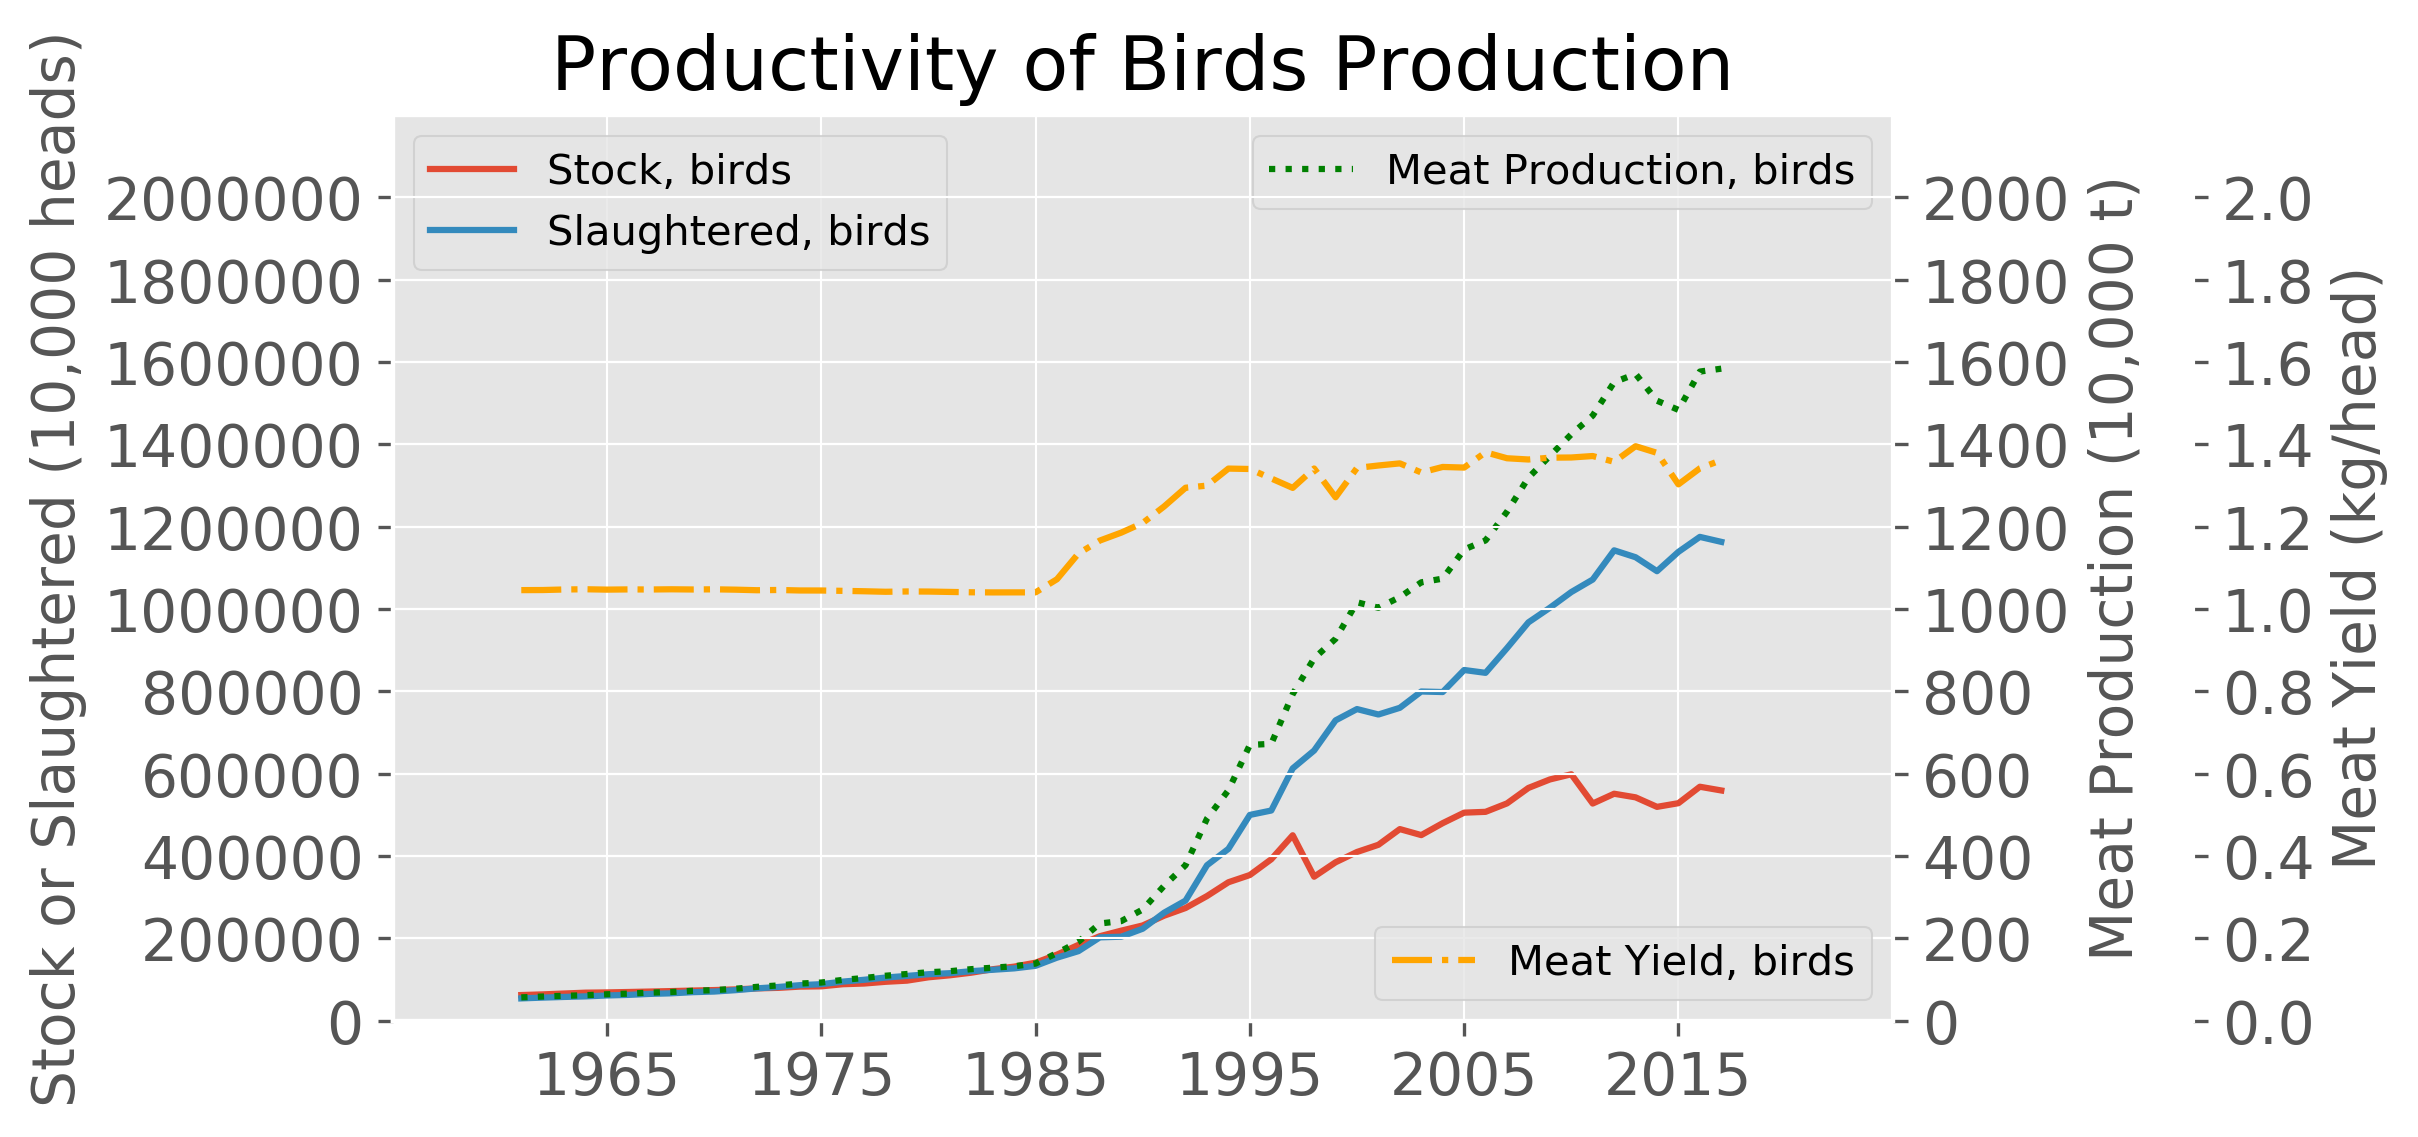

In [29]:
area = 'China, mainland'

plotProductivity(
    df_=df, 
    area_=area, 
    fig_size = (8, 4)
)

### Aquatic production by Captured and Aquacultured in Manland China
### 中国大陆水产的捕捞产量和养殖产量

In [39]:
def plotAquatic(
    df_,
    area_,
    fig_size,
):    
    items = ['Marine, capture', 'Marine, aquac.', 'Freshwater, capture', 'Freshwater, aquac.']

    df_=df_.copy()
    df_res = df_[df_['Area']=='China, mainland'][['Year']+items]
    df_res['Sum'] = df_res[items].apply(lambda x: x.sum(), axis=1)
    df_res = df_res.dropna()

    display(df_res.head())

    fig = plt.figure(figsize = fig_size, dpi = 300)
    fig.tight_layout()                          
    plt.subplots_adjust(wspace =0.5, hspace =0.12)

    years = range(1980, DATA_YEAR)                                     # years  
    step = 5                                                        # for X ticks
    X_ticks = list(range(years[0], years[-1]+years[-1]%step, step))   # X ticks
    Y_lab = 'Aquatic Production (10,000 t)'                                    # Y label
    title = "Aquatic production by Captured and Aquacultured in {}".format(area_.title())                   # title

    colors=['lightskyblue','b', 'chartreuse','g']

    # === Line Plot
    ax0 = fig.add_subplot(3,1,1)
    plt.title(title, fontsize=TIT_size)

    df_res[['Year']+items].plot.line(x='Year',color=colors, ax=plt.gca())
    Y_max = df_res[items].values.max()
    
    ax=plt.gca()
    ax.legend(frameon=False, loc='center left', fontsize=LEG_size,
              bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    setX_quant(ax, X_ticks, step)
    setY_quant(ax, Y_max, Y_lab)


    # === Stacked stream (absolute values) ===
    ax1 = fig.add_subplot(3,1,2)
    
    df_res[['Year']+items].plot.area(x='Year', color=colors, stacked=True, ax=plt.gca())
    Y_max = df_res['Sum'].values.max()
    
    ax = plt.gca()
    ax.legend(frameon=False, loc='center left', fontsize=LEG_size,
           bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    setX_quant(ax, X_ticks, step)
    setY_quant(ax, Y_max, Y_lab)


    # === Stacked stream (percentages) ===
    ax2 = fig.add_subplot(3,1,3)
    
    for i in items:
        df_res[i]=df_res[i]/df_res['Sum']*100
    display(df_res.head())
    df_res[['Year']+items].plot.area(x='Year', color=colors, stacked=True, ax=plt.gca())
    
    ax = plt.gca()
    ax.legend(frameon=False, loc='center left', fontsize=LEG_size,
           bbox_to_anchor=(1.,0.5),borderaxespad = 0.)
    setX_quant(ax, X_ticks, step)
    setY_per(ax)

    # === Save img
    path = './results/img/CN_AnimalProduction/'+'Capture and Aquac.png'
    bbox = matplotlib.transforms.Bbox([[-1, -0], [10, 15]])
    fig.savefig(path, format='png', transparent=False, dpi=300, bbox_inches =bbox)
    print('Img saved as: ' + path)

Year  Marine, capture  Marine, aquac.  Freshwater, capture  \
17  1978           314.50           45.30                29.50   
19  1980           281.30           44.41                33.97   
24  1985           348.51           71.23                47.64   
25  1986           389.60           85.80                53.80   
26  1987           438.20          110.00                60.00   

    Freshwater, aquac.     Sum  
17               76.20  465.50  
19               90.02  449.70  
24              237.77  705.15  
25              294.40  823.60  
26              347.20  955.40

Year  Marine, capture  Marine, aquac.  Freshwater, capture  \
17  1978        67.561762        9.731472             6.337272   
19  1980        62.552813        9.875473             7.553925   
24  1985        49.423527       10.101397             6.756009   
25  1986        47.304517       10.417678             6.532297   
26  1987        45.865606       11.513502             6.280092   

    Freshwater, aquac.     Sum  
17           16.369495  465.50  
19           20.017790  449.70  
24           33.719067  705.15  
25           35.745508  823.60  
26           36.340800  955.40

Img saved as: ./results/img/CN_AnimalProduction/Capture and Aquac.png


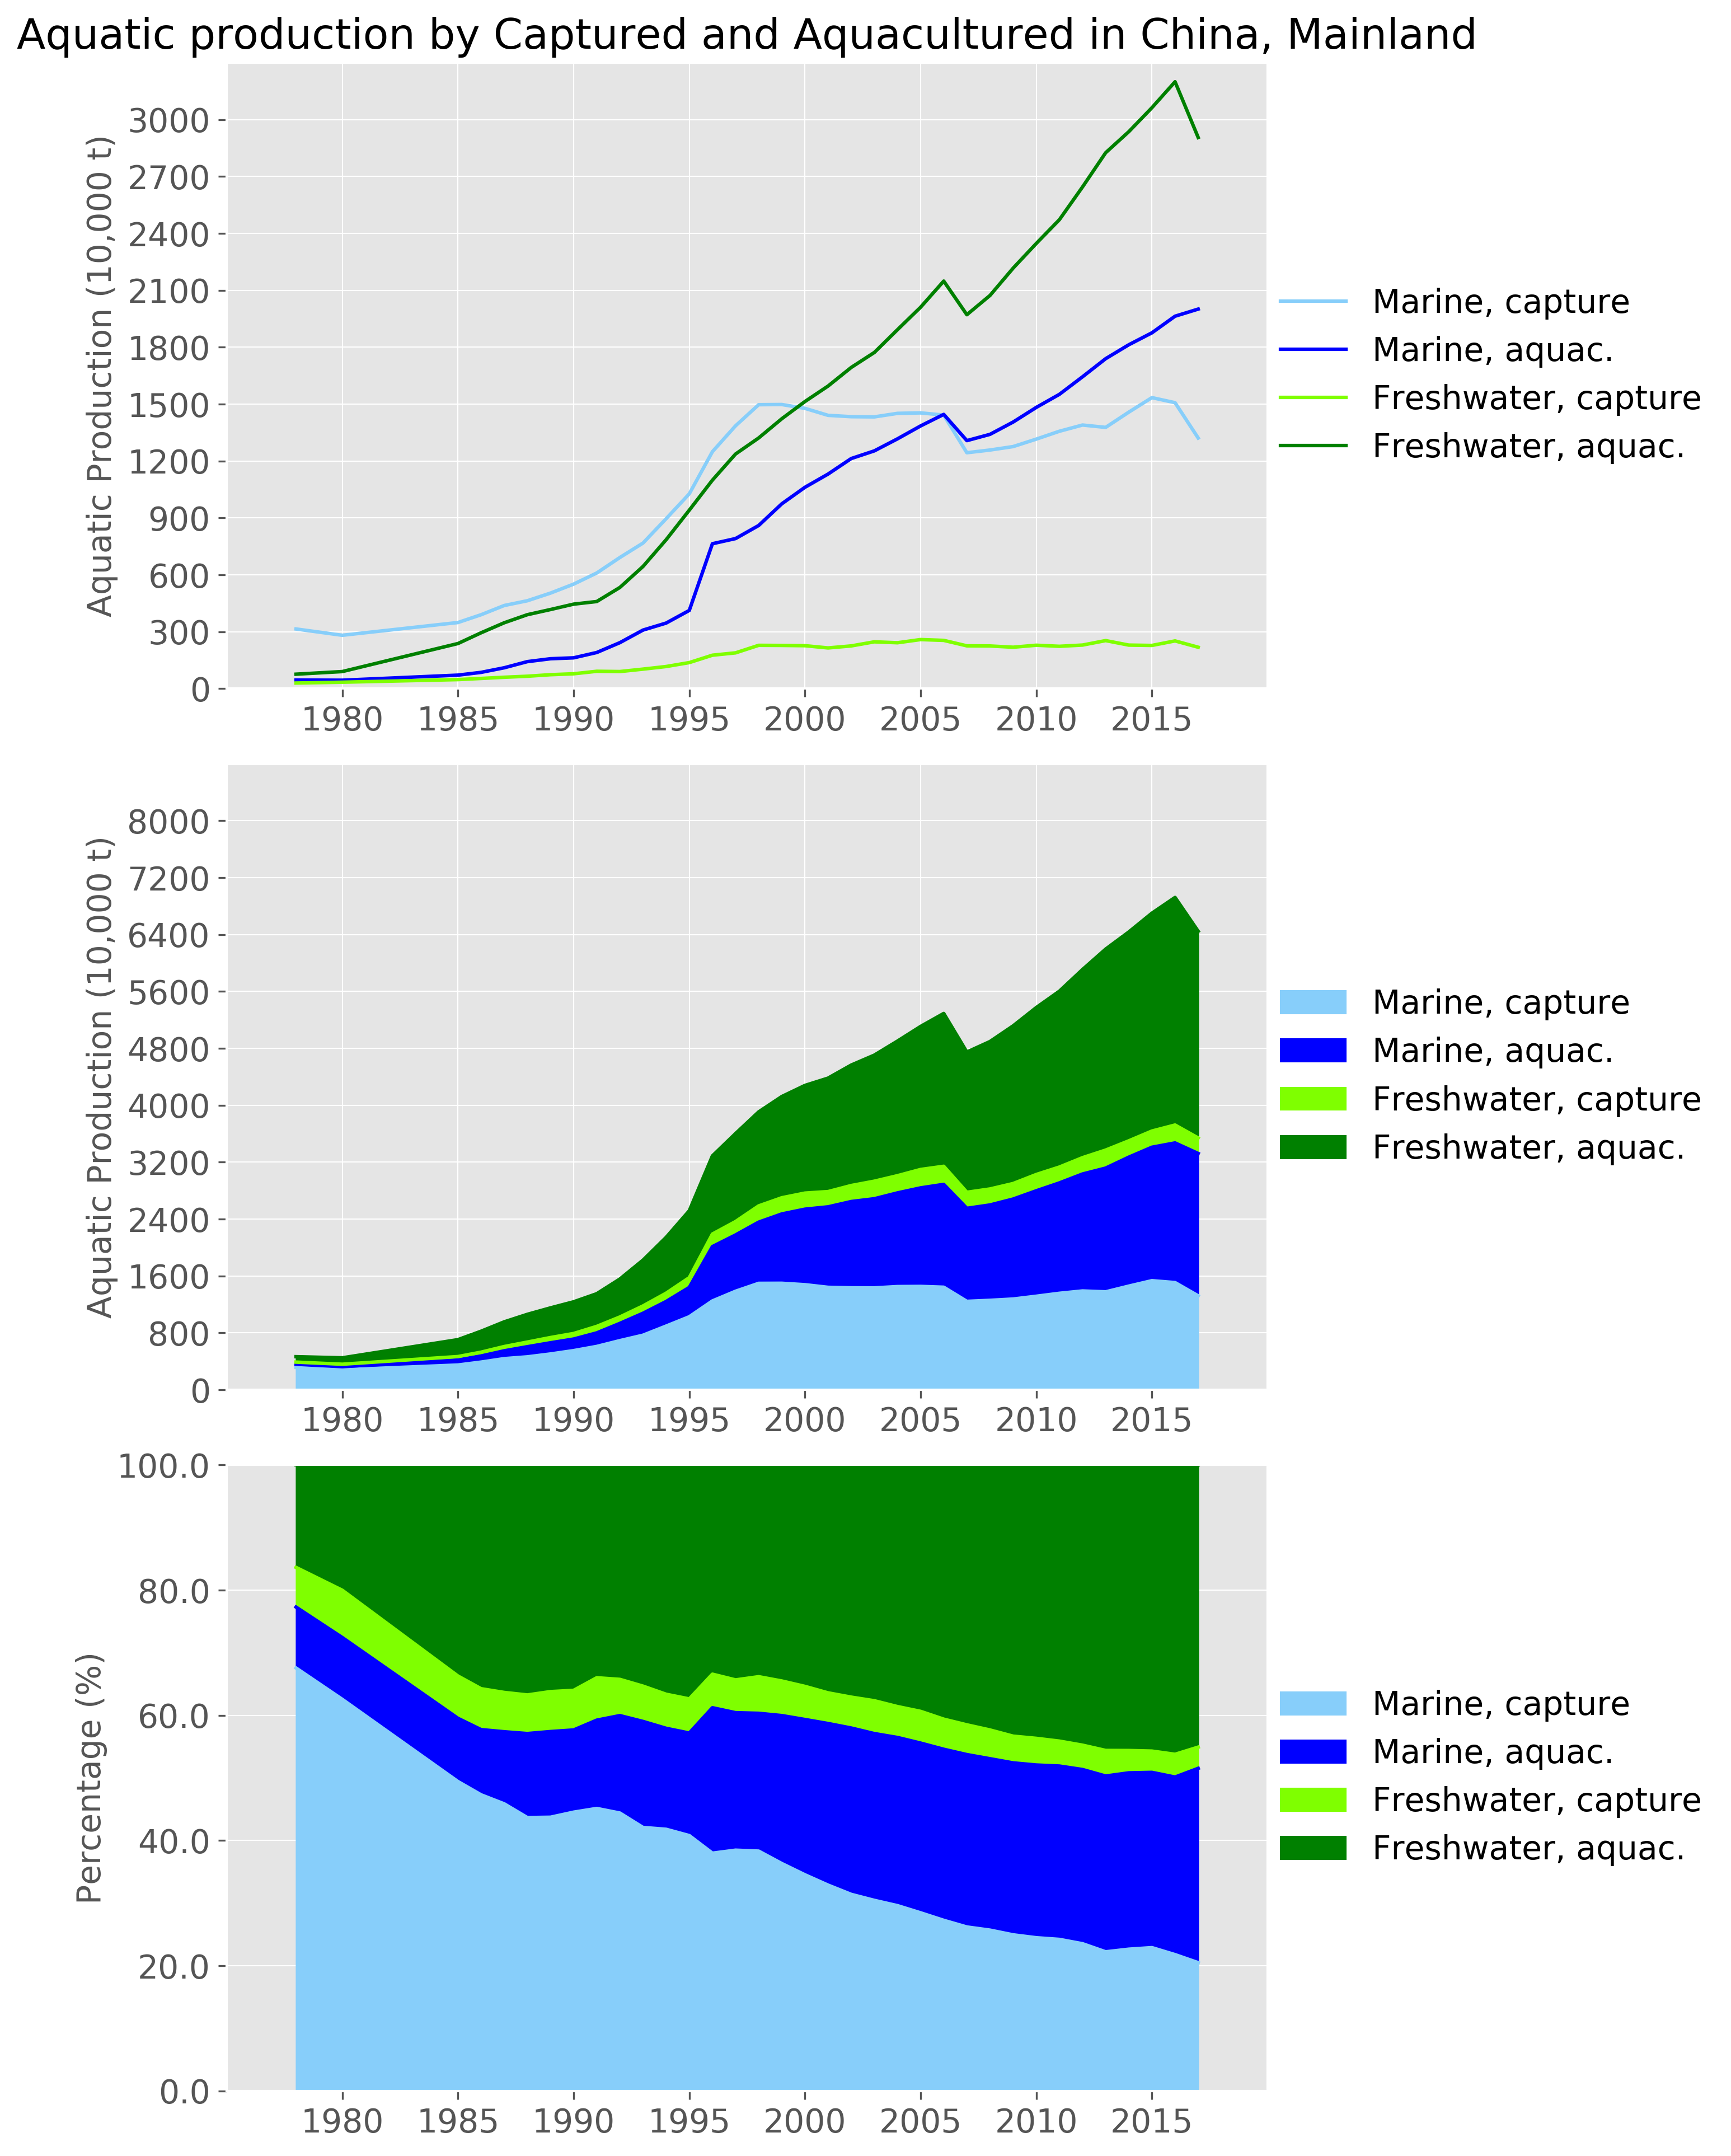

In [40]:
area = 'China, mainland'

plotAquatic(
    df_=df,
    area_=area,
    fig_size=(8,16)
)